In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [91]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [92]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [93]:
df.shape

(1460, 81)

#### Descriptive statistics

In [94]:
req_variables_for_descStatistics = df[['LotArea', 'MasVnrArea', 'YearBuilt', 'LotFrontage', 'BsmtFinSF1', 'BsmtUnfSF', 'GrLivArea', 'OverallQual', 'TotalBsmtSF']]
req_variables_for_descStatistics.describe()



LotArea   MasVnrArea    YearBuilt  LotFrontage   BsmtFinSF1  \
count    1460.000000  1452.000000  1460.000000  1201.000000  1460.000000   
mean    10516.828082   103.685262  1971.267808    70.049958   443.639726   
std      9981.264932   181.066207    30.202904    24.284752   456.098091   
min      1300.000000     0.000000  1872.000000    21.000000     0.000000   
25%      7553.500000     0.000000  1954.000000    59.000000     0.000000   
50%      9478.500000     0.000000  1973.000000    69.000000   383.500000   
75%     11601.500000   166.000000  2000.000000    80.000000   712.250000   
max    215245.000000  1600.000000  2010.000000   313.000000  5644.000000   

         BsmtUnfSF    GrLivArea  OverallQual  TotalBsmtSF  
count  1460.000000  1460.000000  1460.000000  1460.000000  
mean    567.240411  1515.463699     6.099315  1057.429452  
std     441.866955   525.480383     1.382997   438.705324  
min       0.000000   334.000000     1.000000     0.000000  
25%     223.000000  1129.500000     5.000000   795.750000  
50%     477.500000  1464.000000     6.000000   991.500000  
75%     808.000000  1776.750000     7.000000  1298.250000  
max    2336.000000  5642.000000    10.000000  6110.000000

#### Data Preprocessing

In [95]:
null_value_cols = []
print("Percentage of missing values in all columns \n")
for col in df.columns:
    null_count = df[col].isnull().sum()
    if null_count > 1:
        null_percentage = np.round(null_count / len(df) * 100, 2)
        print(f"{col}: {null_percentage}%")
        null_value_cols.append(col)

Percentage of missing values in all columns 

LotFrontage: 17.74%
Alley: 93.77%
MasVnrType: 0.55%
MasVnrArea: 0.55%
BsmtQual: 2.53%
BsmtCond: 2.53%
BsmtExposure: 2.6%
BsmtFinType1: 2.53%
BsmtFinType2: 2.6%
FireplaceQu: 47.26%
GarageType: 5.55%
GarageYrBlt: 5.55%
GarageFinish: 5.55%
GarageQual: 5.55%
GarageCond: 5.55%
PoolQC: 99.52%
Fence: 80.75%
MiscFeature: 96.3%


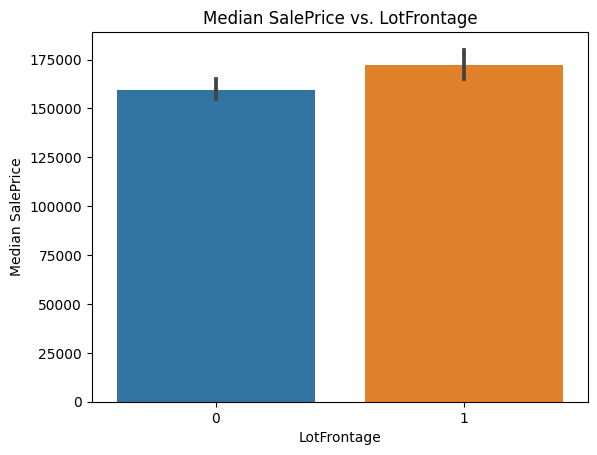

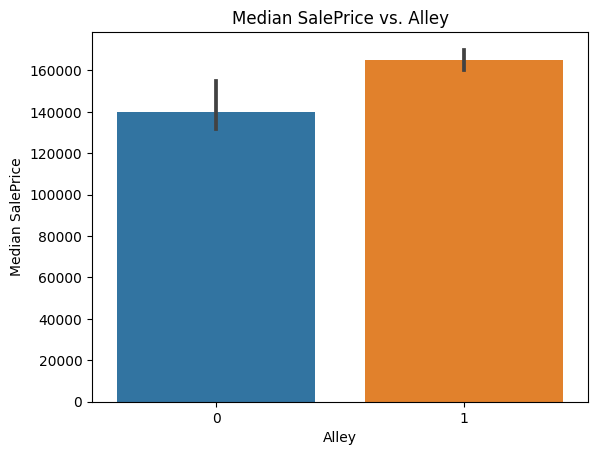

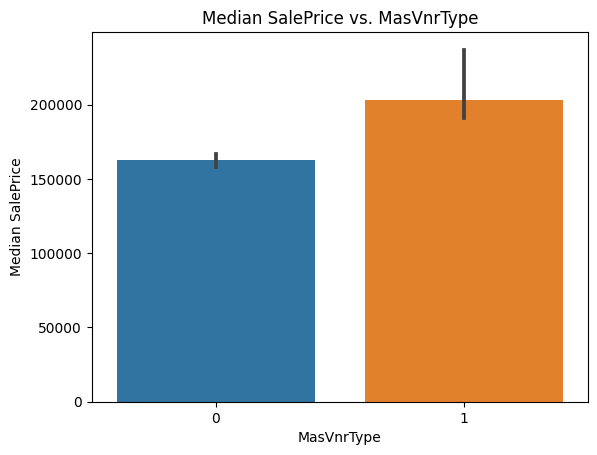

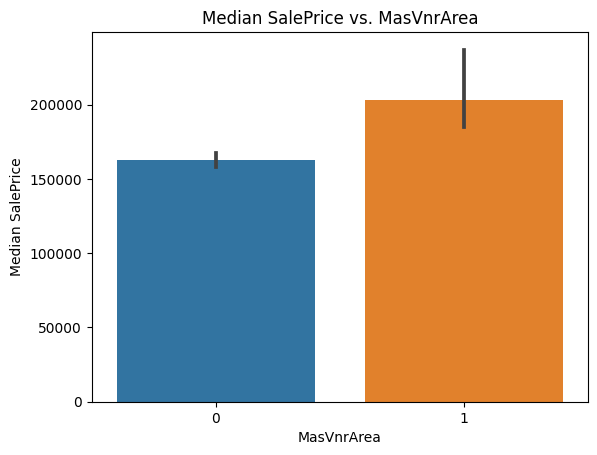

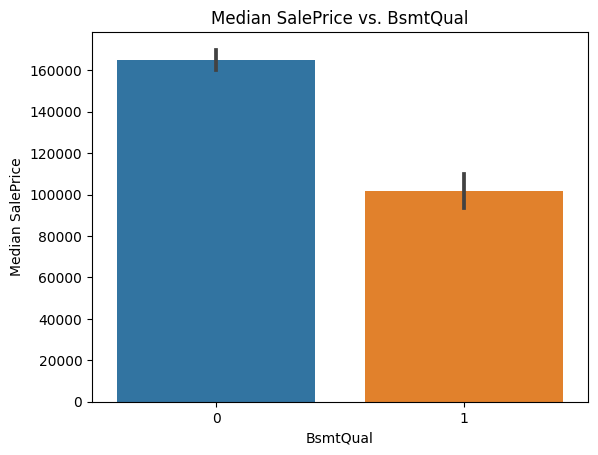

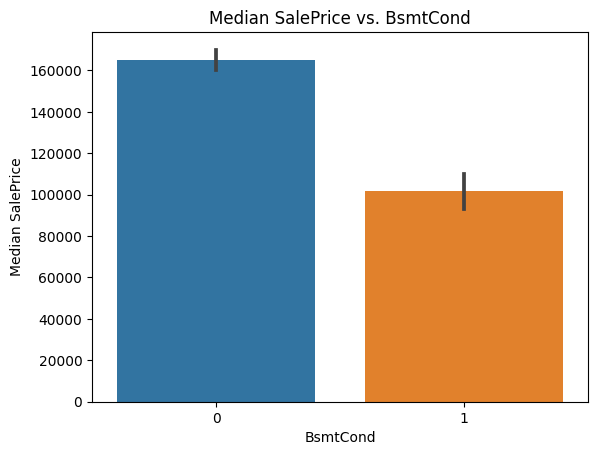

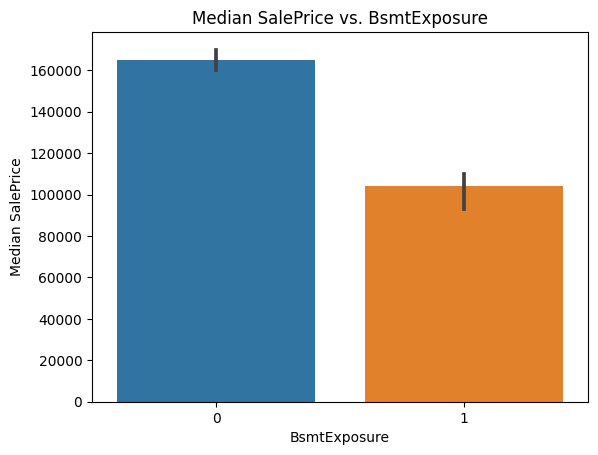

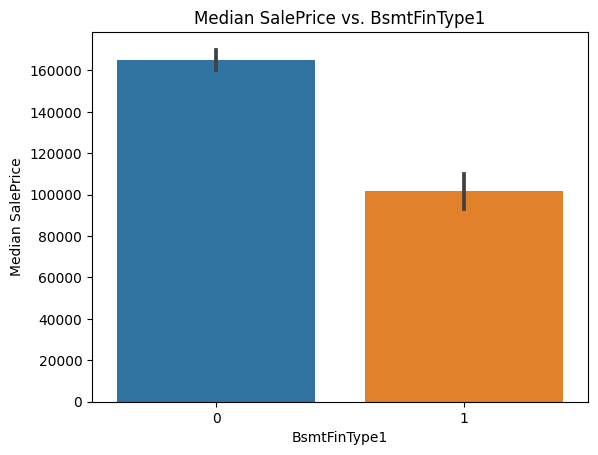

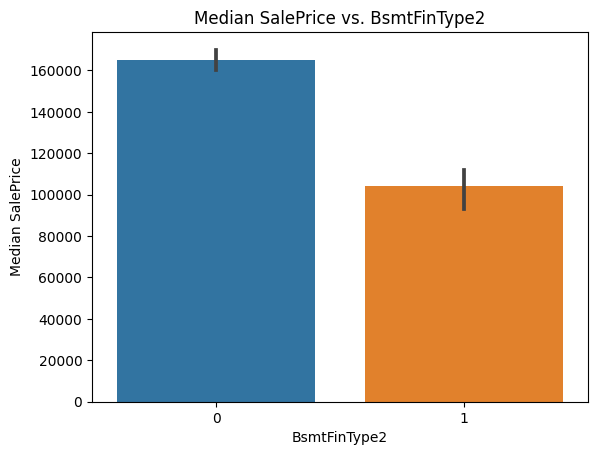

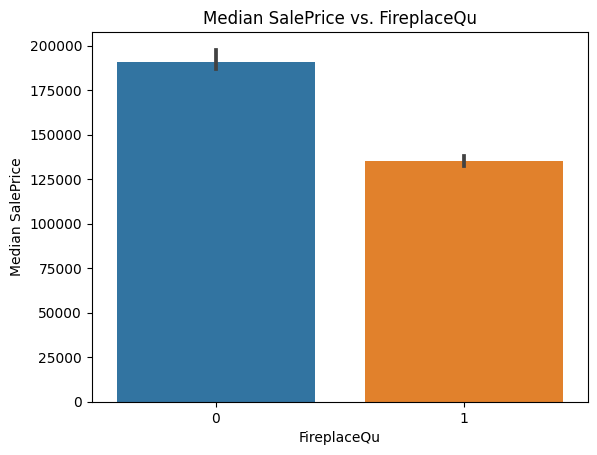

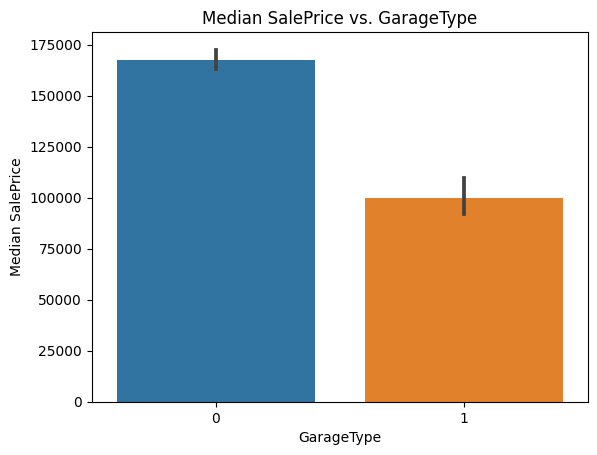

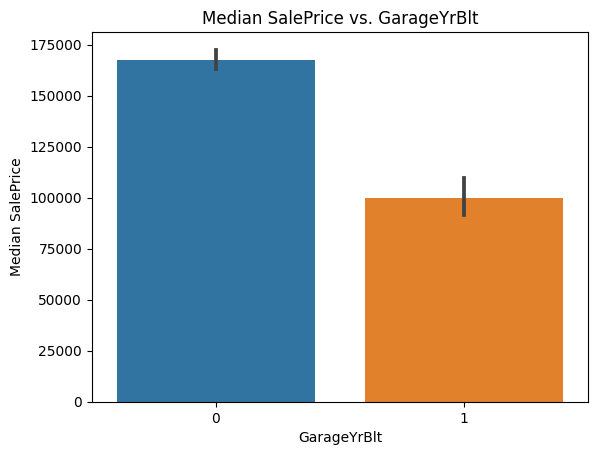

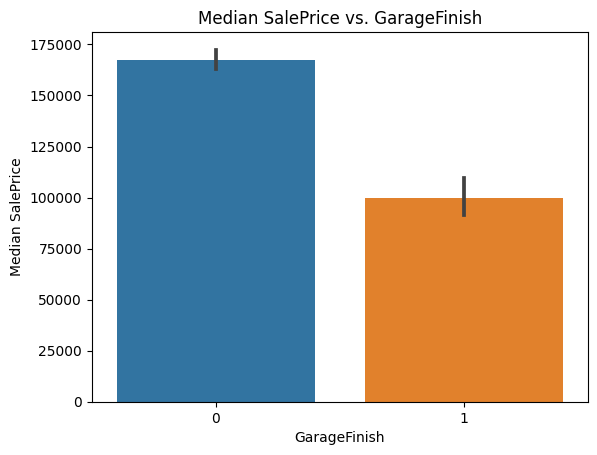

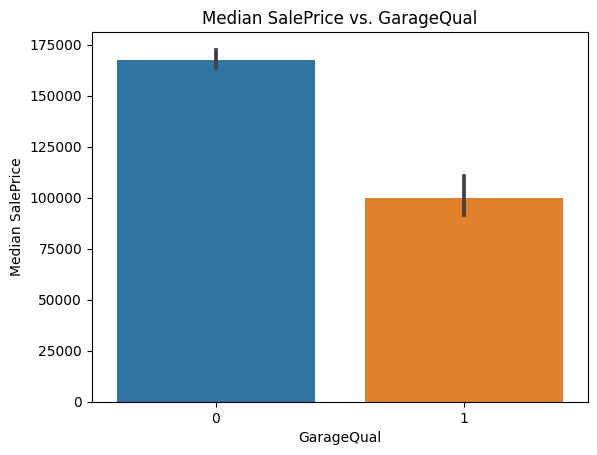

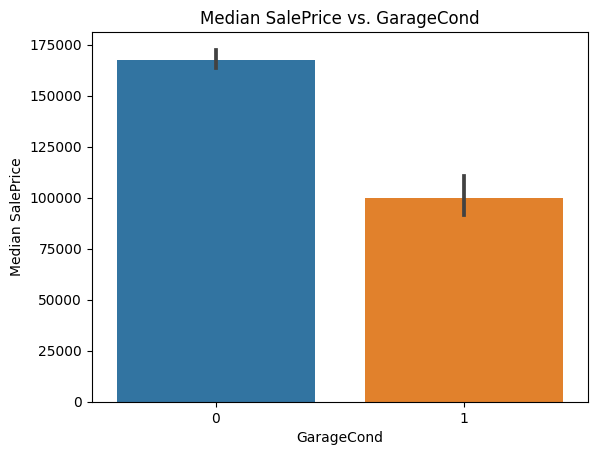

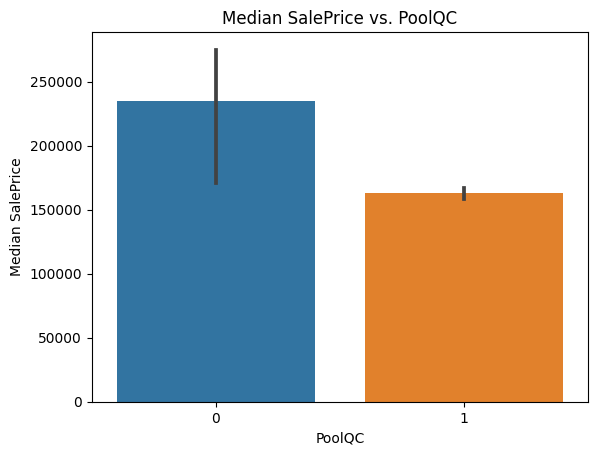

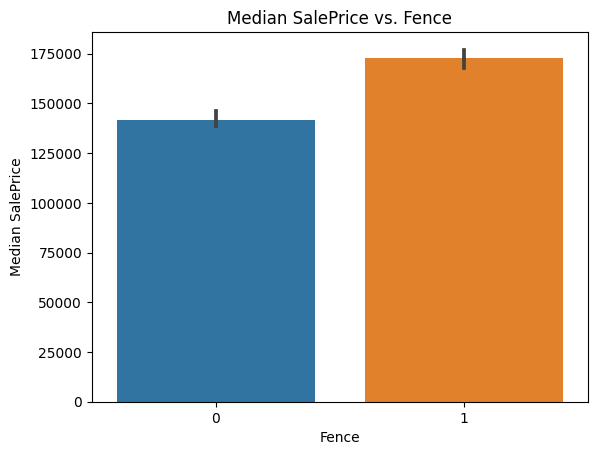

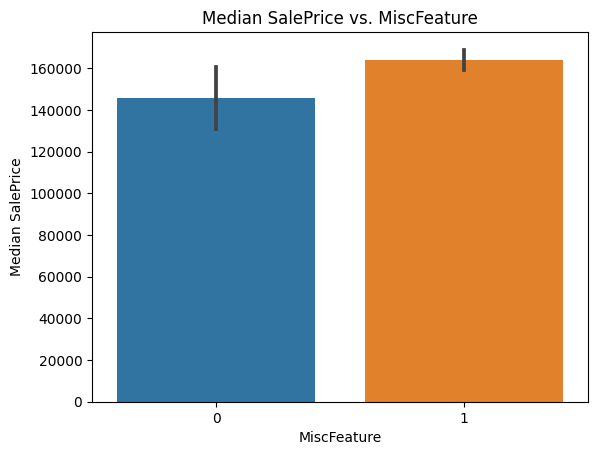

In [96]:
for col in null_value_cols:
    df2 = df.copy()
    df2[col] = df2[col].isnull().astype(int)

    # Calculate the median SalePrice where the information is missing or present
    sns.barplot(x=col, y='SalePrice', data=df2, estimator=np.median)
    plt.title(f"Median SalePrice vs. {col}")
    plt.xlabel(col)
    plt.ylabel("Median SalePrice")
    plt.show()

In [97]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("{} Numerical columns".format(len(numerical_cols)))

df[numerical_cols].head()

38 Numerical columns


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [98]:
year_cols = list(filter(lambda column: 'Yr' in column or 'Year' in column, numerical_cols))
year_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

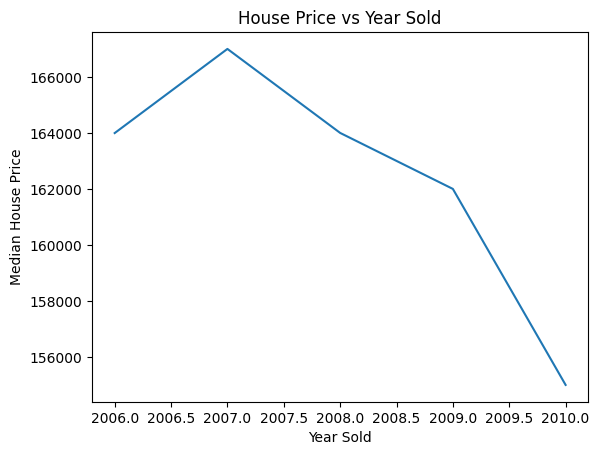

In [99]:
median_prices_by_year = df.groupby('YrSold')['SalePrice'].median().reset_index()

sns.lineplot(x='YrSold', y='SalePrice', data=median_prices_by_year)

plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs Year Sold")

plt.show()


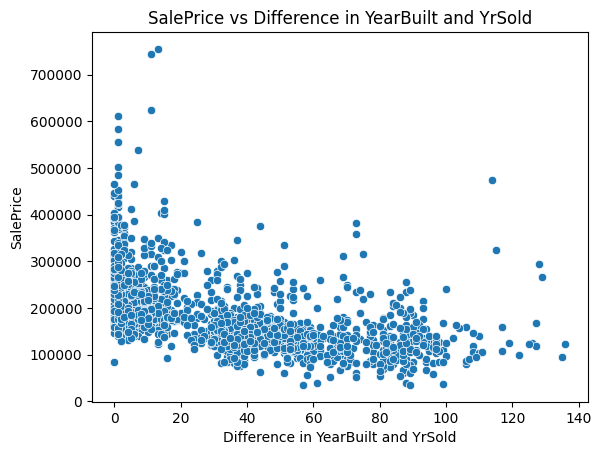

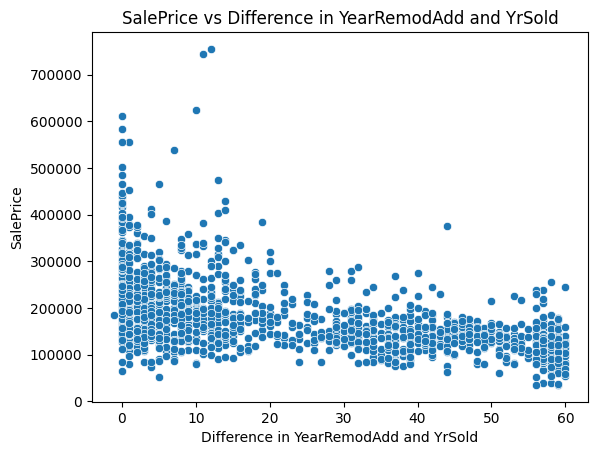

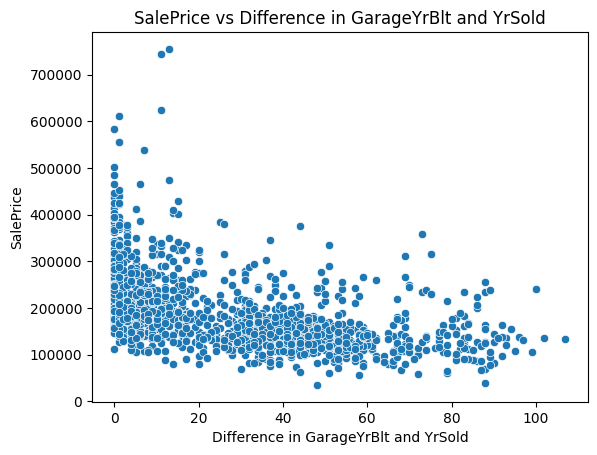

In [13]:
for col in year_cols:
    if col != 'YrSold':
        df3 = df.copy()

        df3[col] = df3['YrSold'] - df3[col]


        sns.scatterplot(x=col, y='SalePrice', data=df3)

        plt.xlabel(f'Difference in {col} and YrSold')
        plt.ylabel('SalePrice')
        plt.title(f"SalePrice vs Difference in {col} and YrSold")
        plt.show()

In [14]:
unique_counts = df[numerical_cols].nunique()

discrete_num_cols = unique_counts[unique_counts < 25].index.tolist()
discrete_num_cols = [col for col in discrete_num_cols if col not in year_cols+['Id']]

print("Discrete Numerical columns:", len(discrete_num_cols))

discrete_num_cols

Discrete Numerical columns: 17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

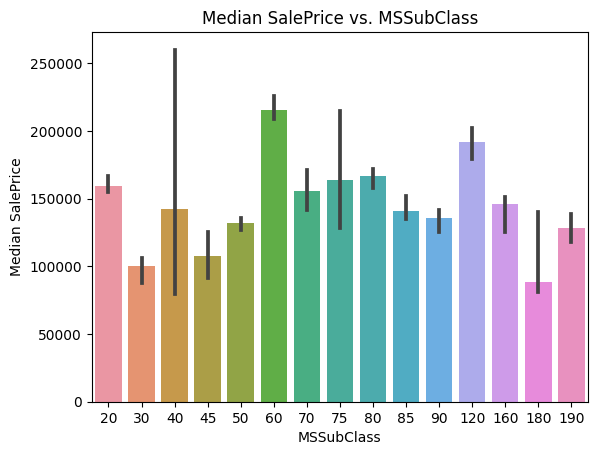

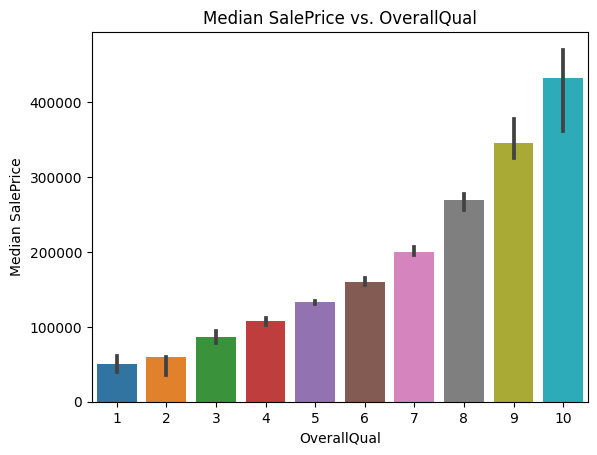

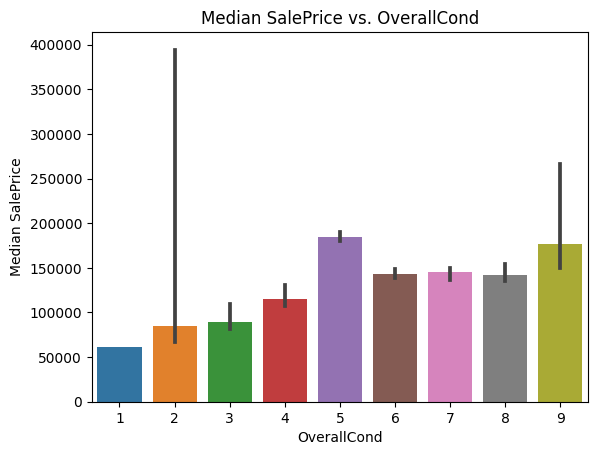

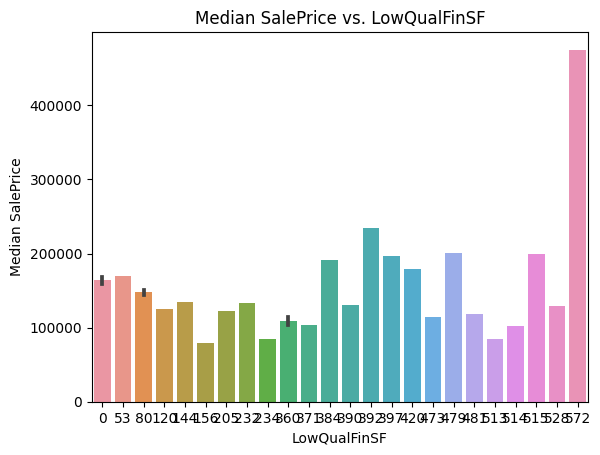

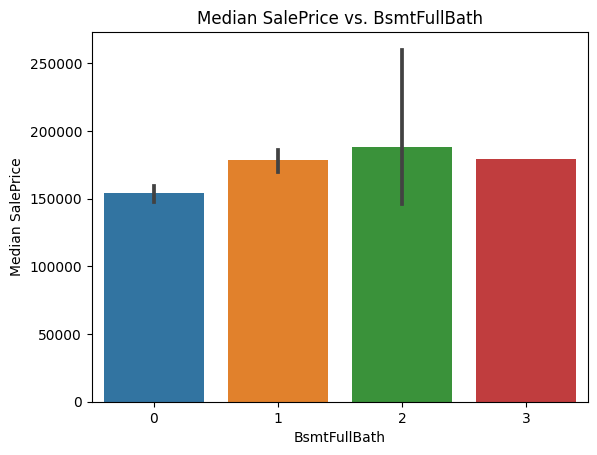

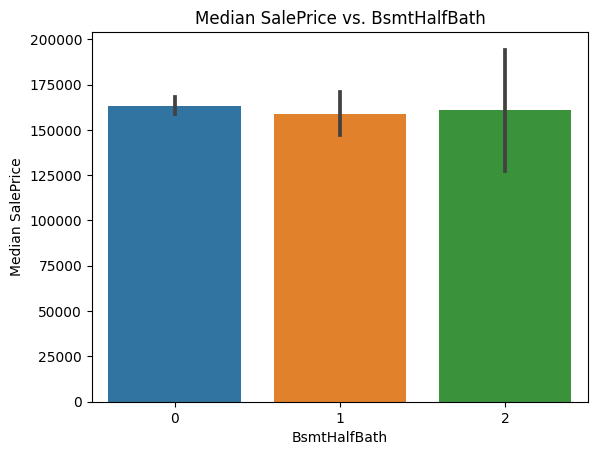

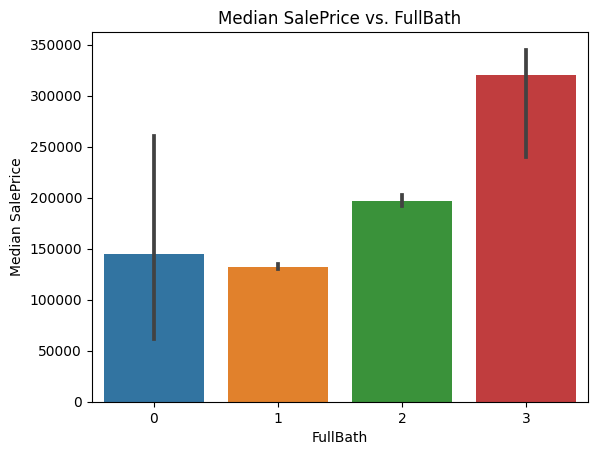

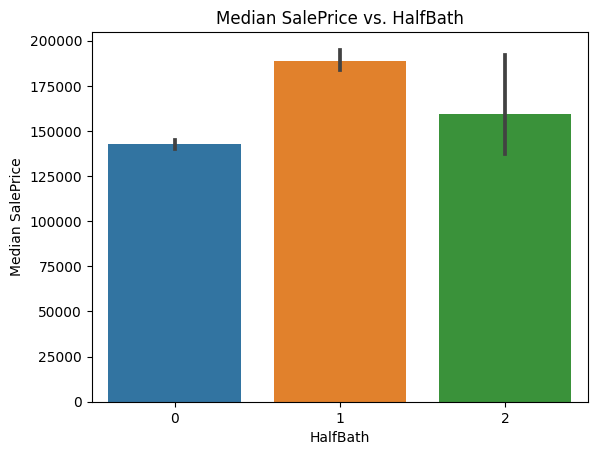

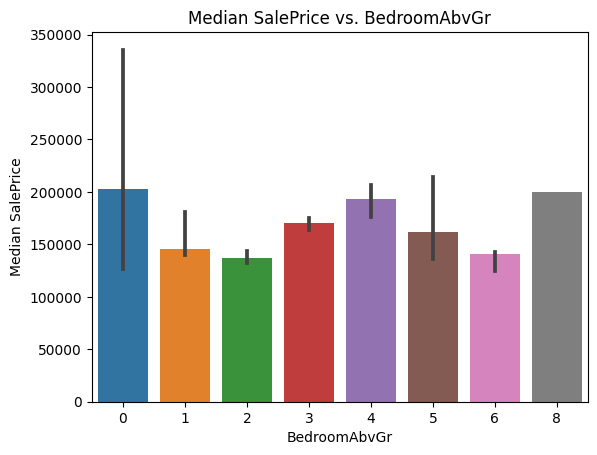

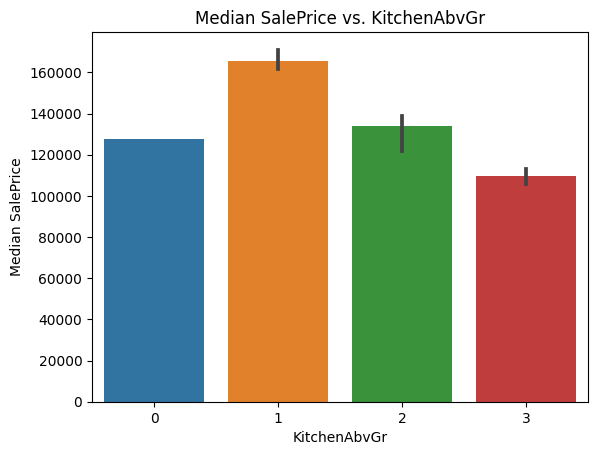

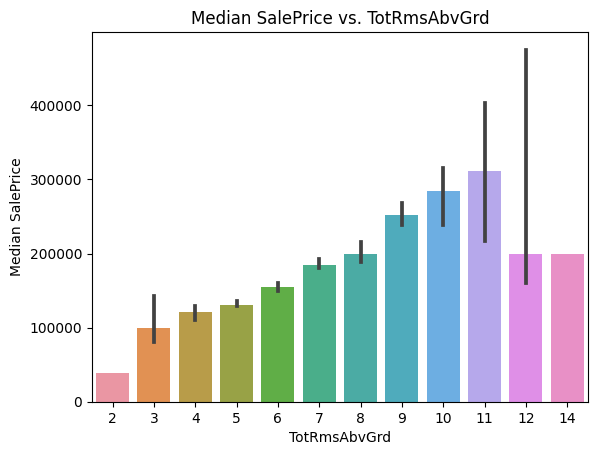

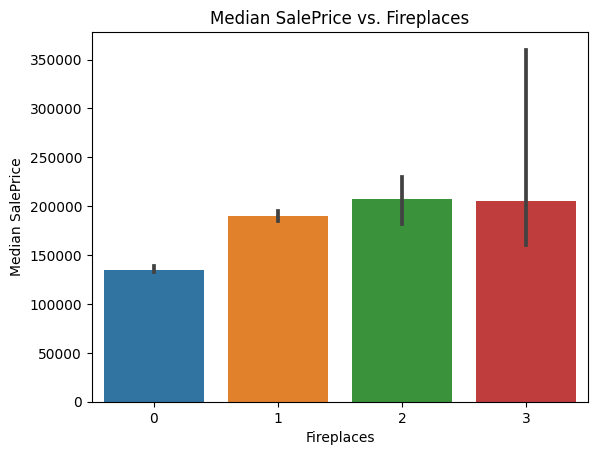

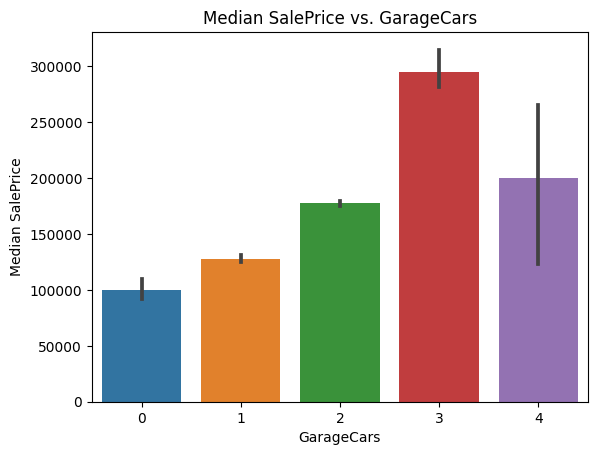

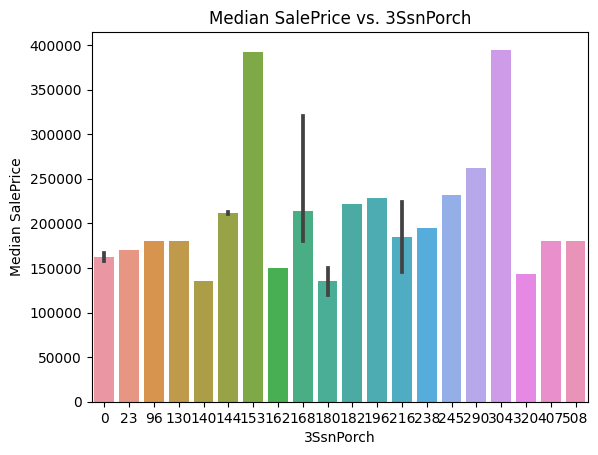

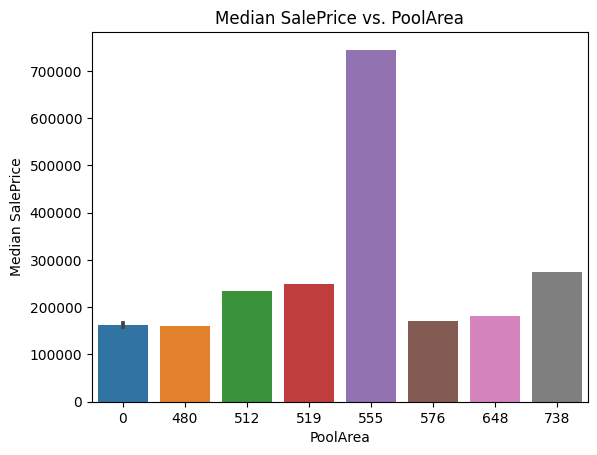

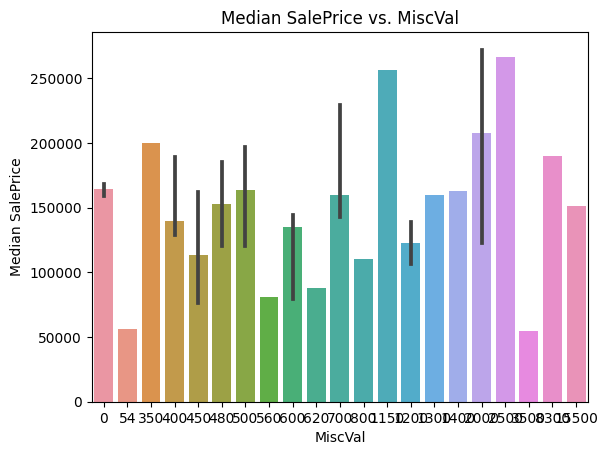

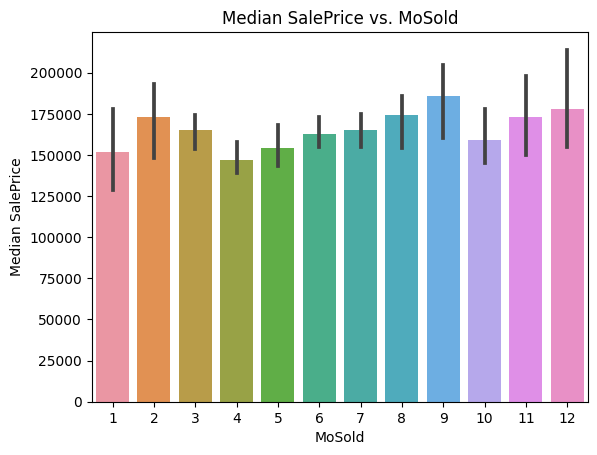

In [15]:
for col in discrete_num_cols:
    df4 = df.copy()

    sns.barplot(x=col, y='SalePrice', data=df2, estimator=np.median)
    plt.title(f"Median SalePrice vs. {col}")
    plt.xlabel(col)
    plt.ylabel("Median SalePrice")
    plt.show()

In [100]:
continuous_num_cols = [col for col in numerical_cols if col not in discrete_num_cols and col not in year_cols+['Id']]

print("Continuous Numerical columns:", len(continuous_num_cols))

continuous_num_cols

Continuous Numerical columns: 16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

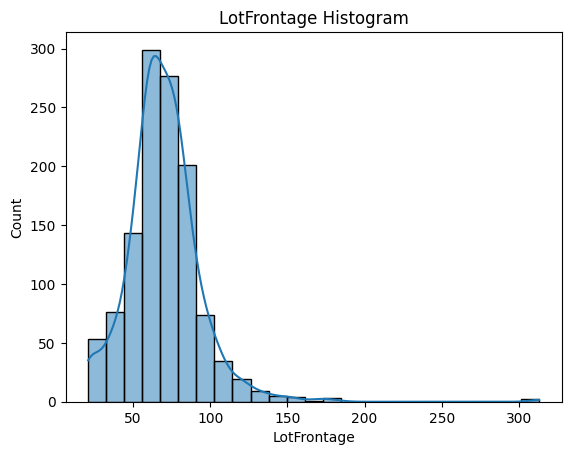

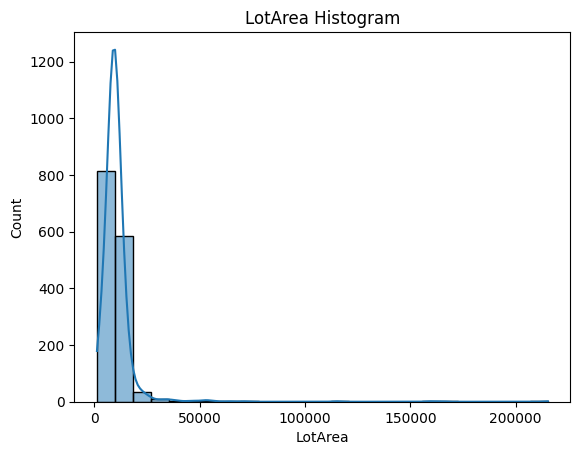

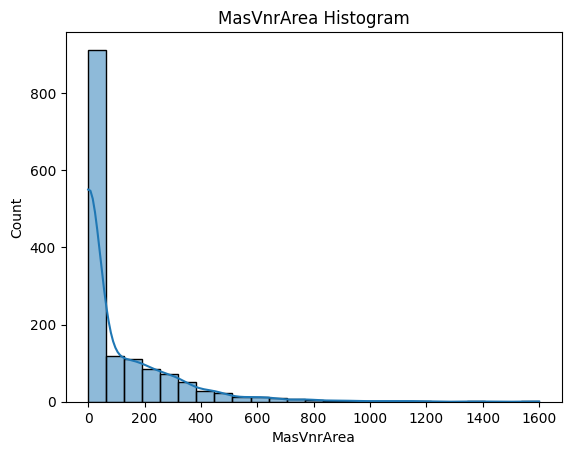

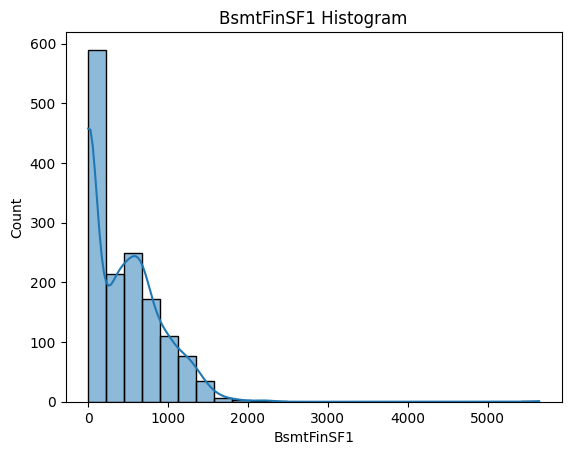

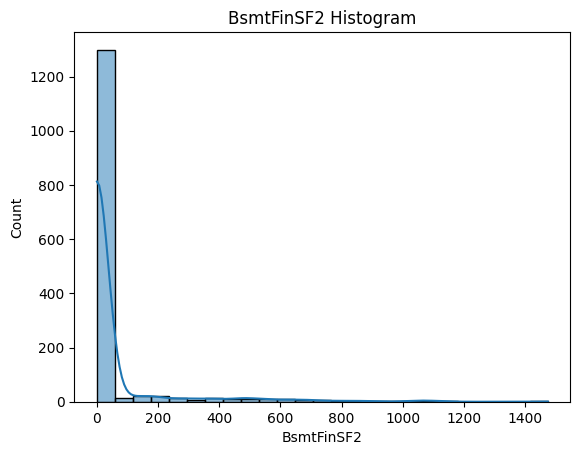

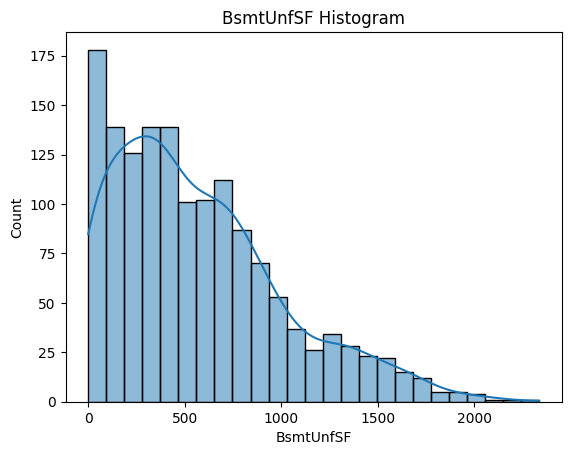

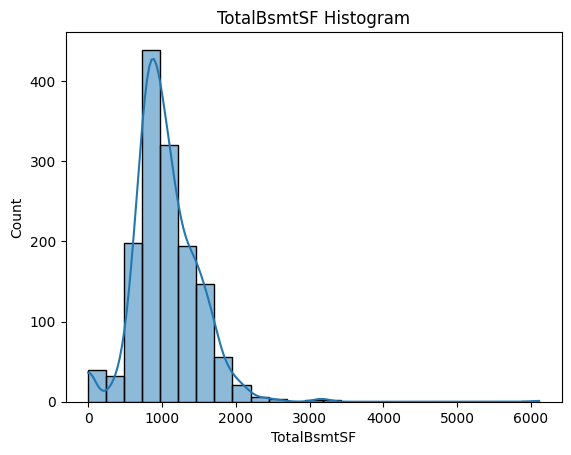

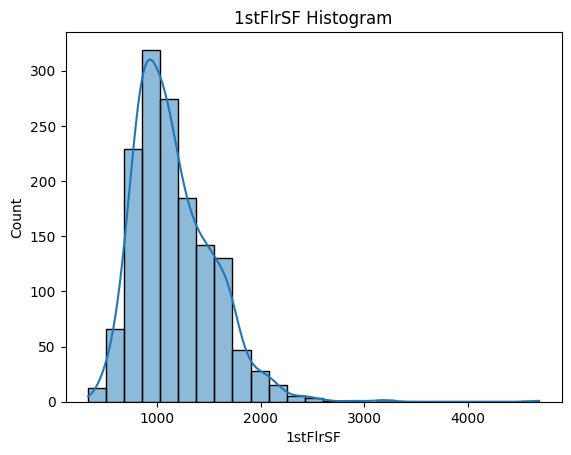

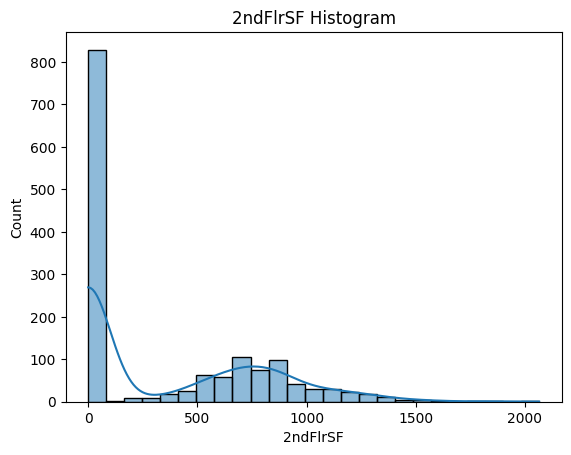

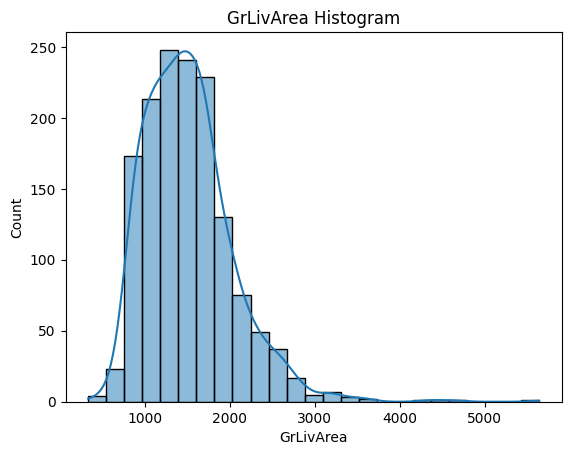

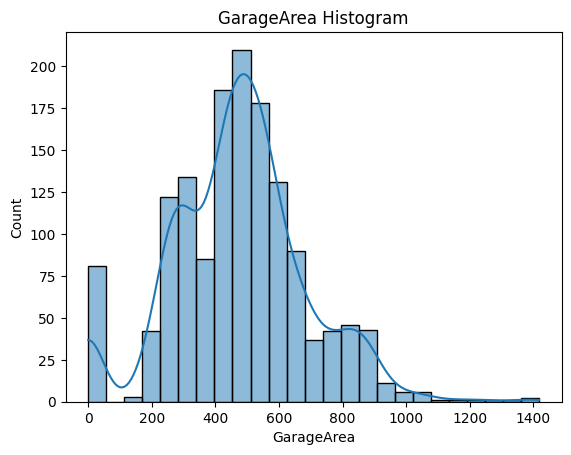

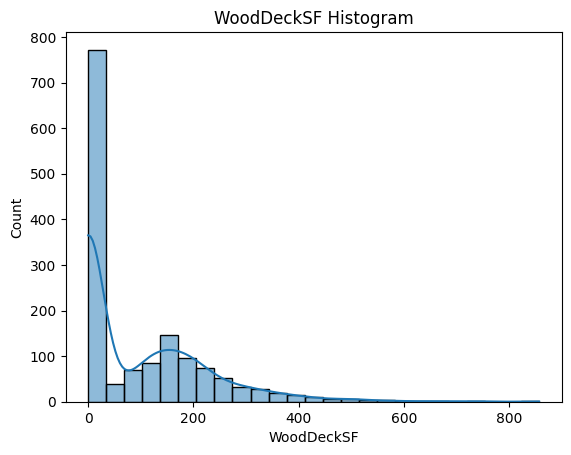

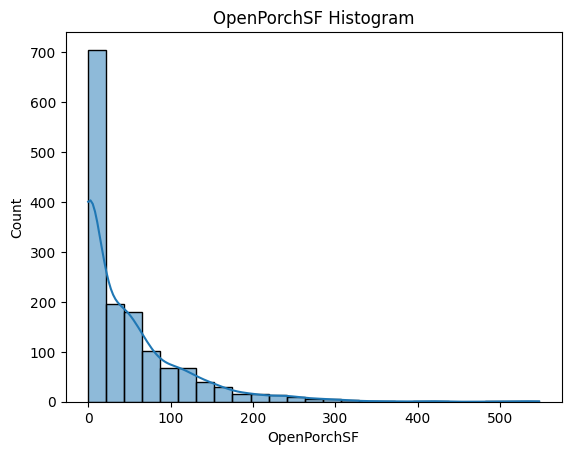

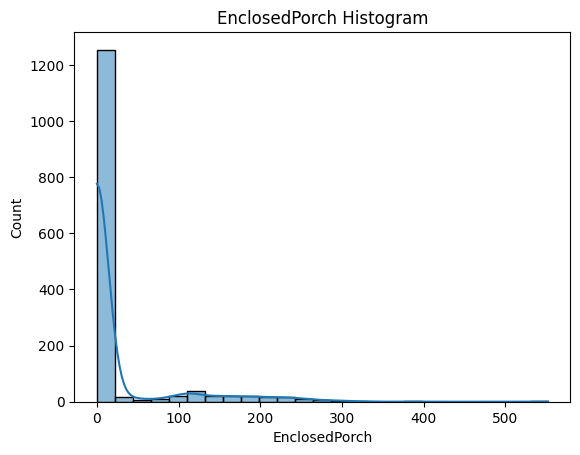

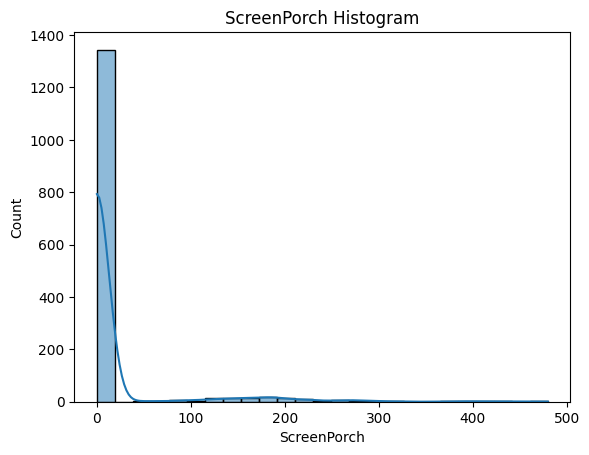

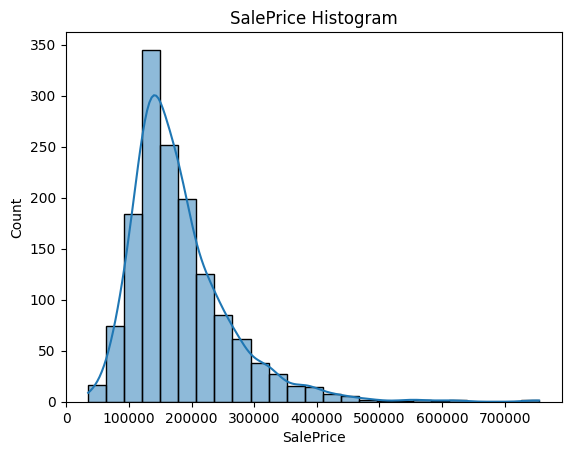

In [101]:
for col in continuous_num_cols:
    df5 = df.copy()

    sns.histplot(data=df5, x=col, bins=25, kde=True)

    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"{col} Histogram")
    plt.show()

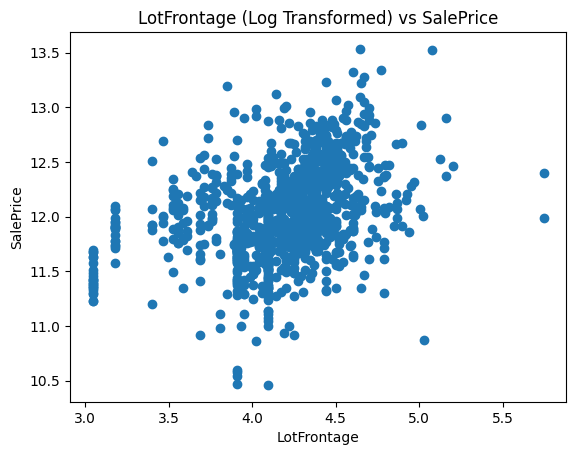

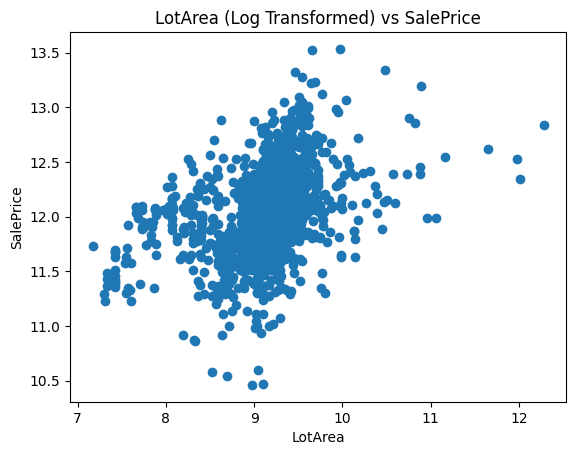

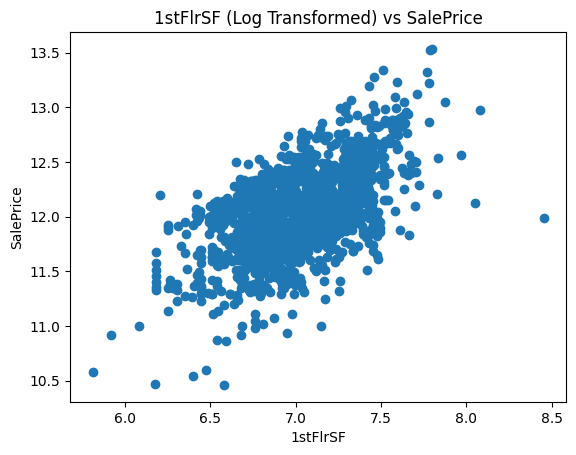

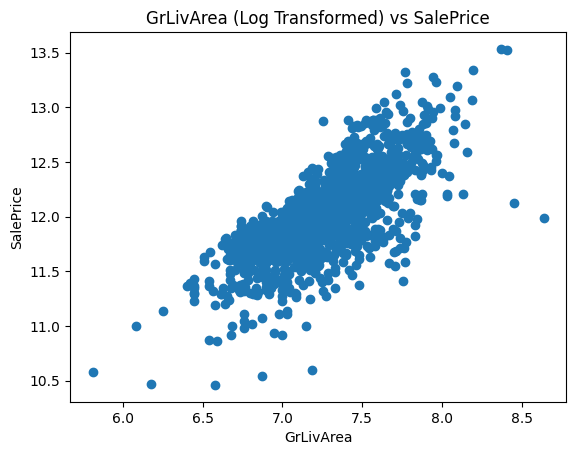

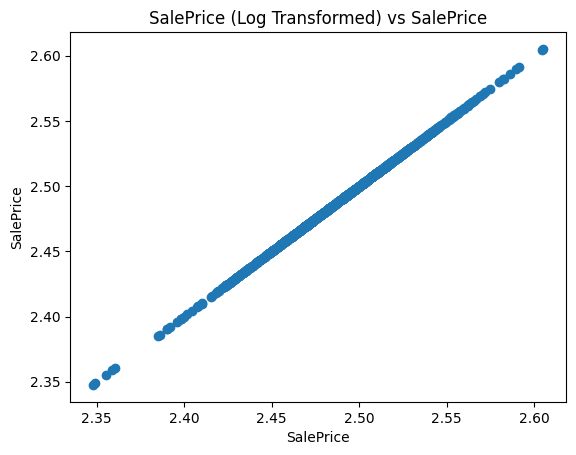

In [102]:
for col in continuous_num_cols:
    df6 = df.copy()

    if 0 not in df6[col].unique():
      df6[col] = np.log(df6[col])
      df6['SalePrice'] = np.log(df6['SalePrice'])

      plt.scatter(df6[col], df6['SalePrice'])
      plt.xlabel(col)
      plt.ylabel('SalePrice')
      plt.title(f"{col} (Log Transformed) vs SalePrice")
      plt.show()



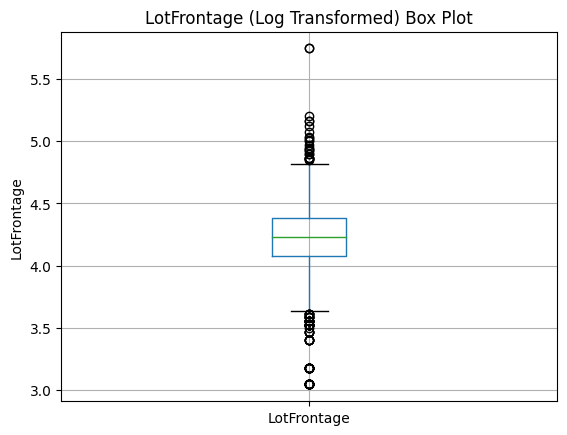

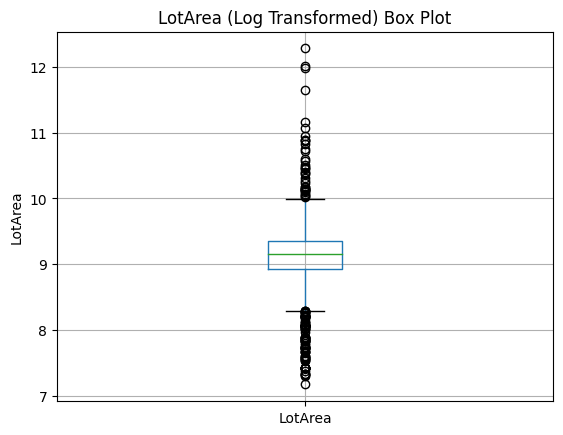

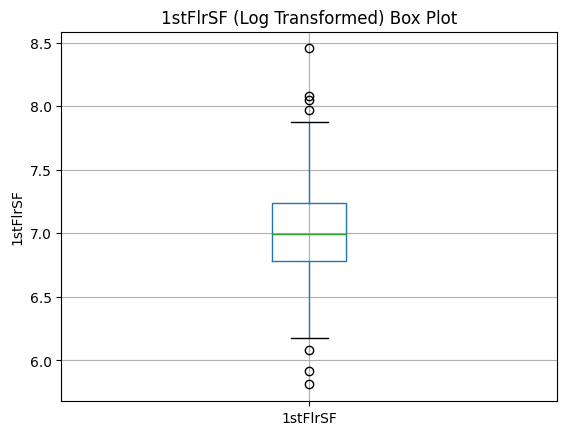

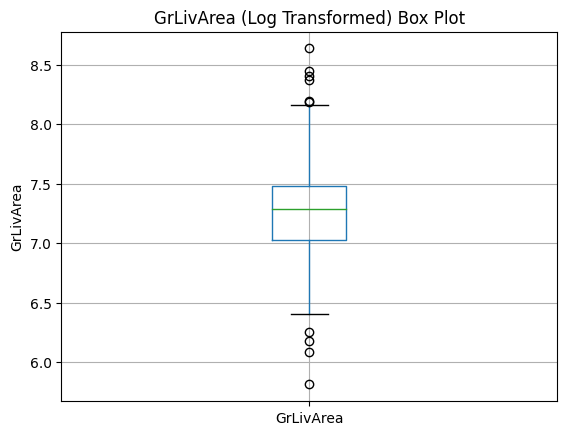

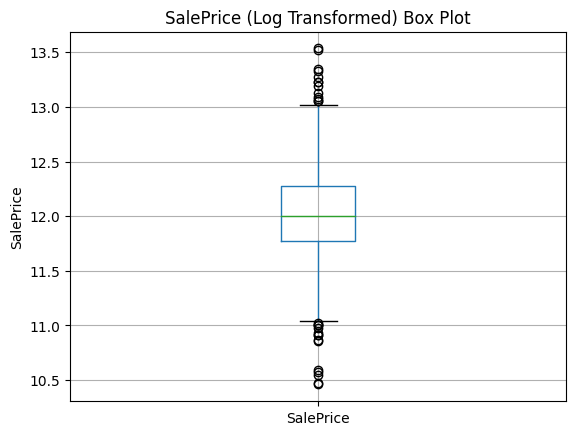

In [103]:
for col in continuous_num_cols:
    df6 = df.copy()

    if 0 not in df6[col].unique():
      df6[col] = np.log(df6[col])
      df6.boxplot(column=col)
      plt.ylabel(col)
      plt.title(f"{col} (Log Transformed) Box Plot")
      plt.show()


In [20]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("{} categorical columns".format(len(categorical_cols)))

df[categorical_cols].head()

43 categorical columns


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

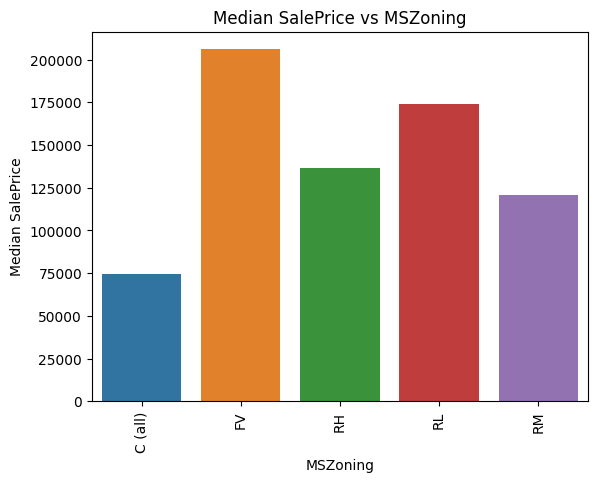

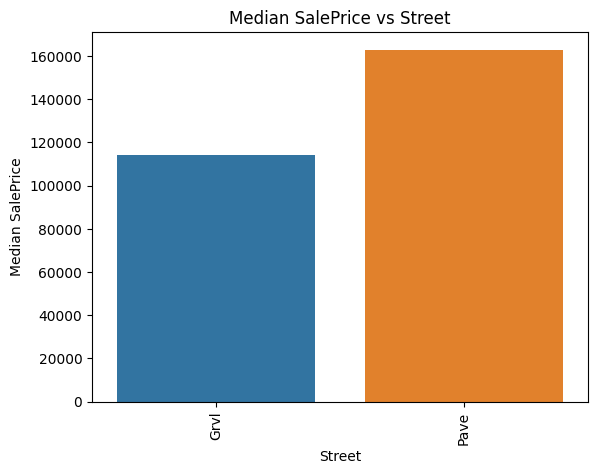

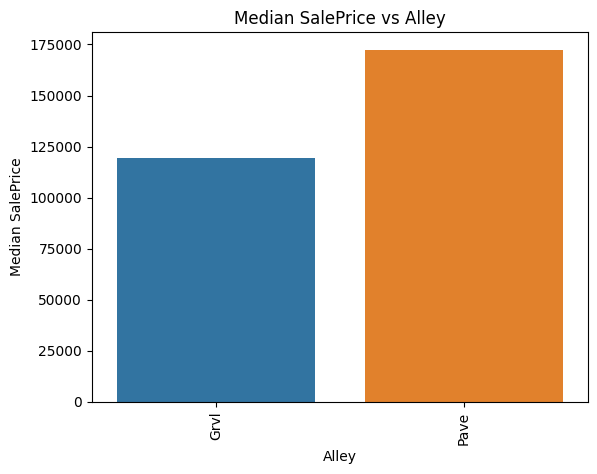

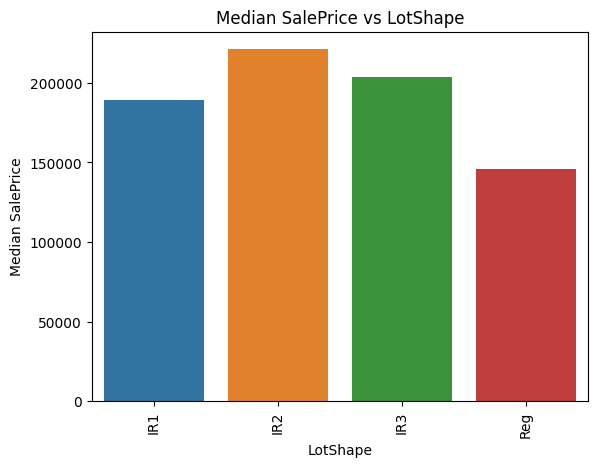

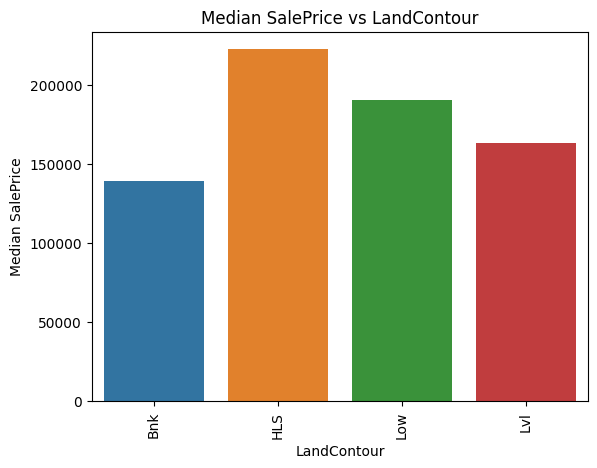

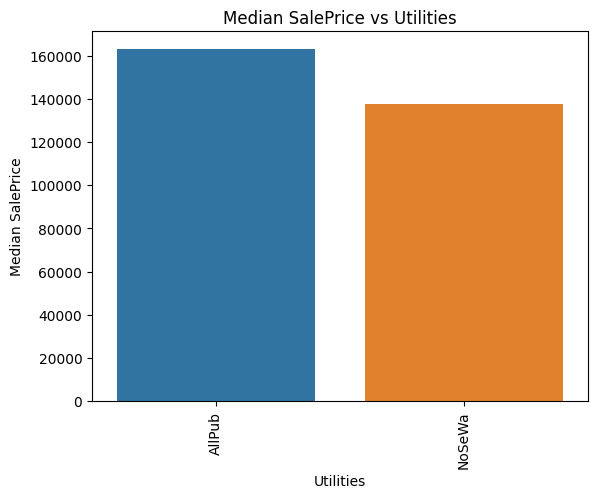

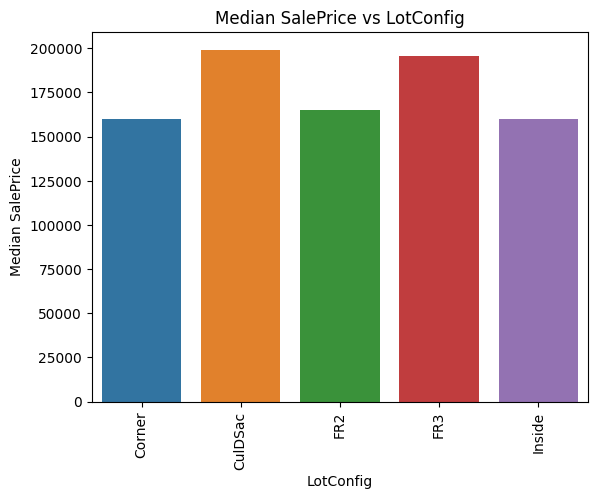

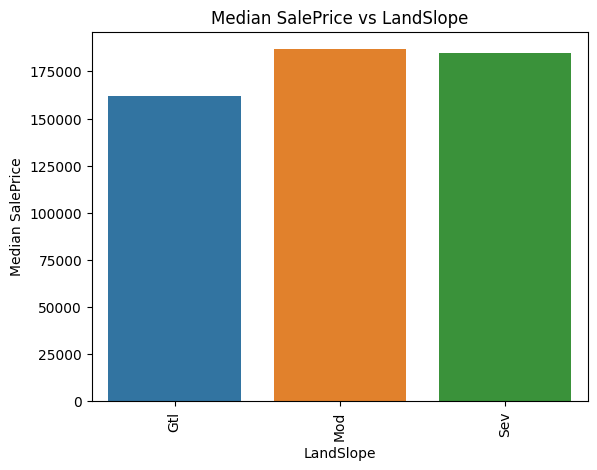

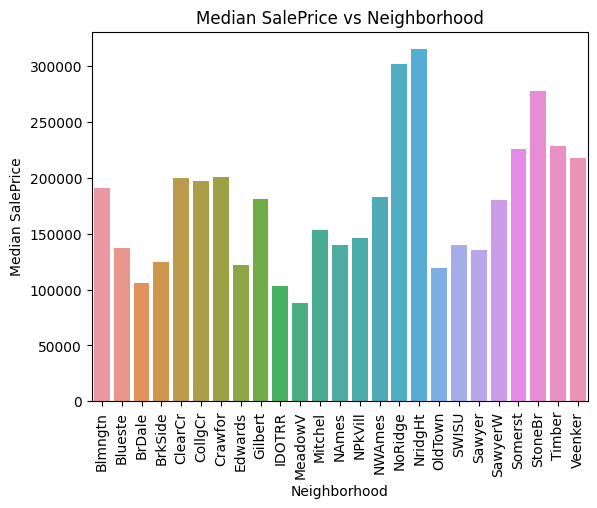

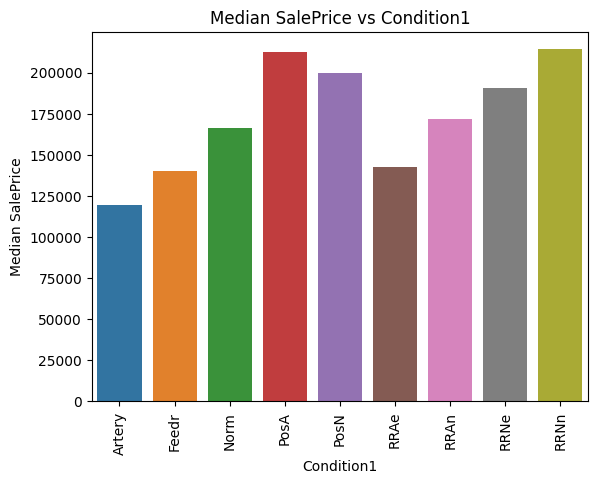

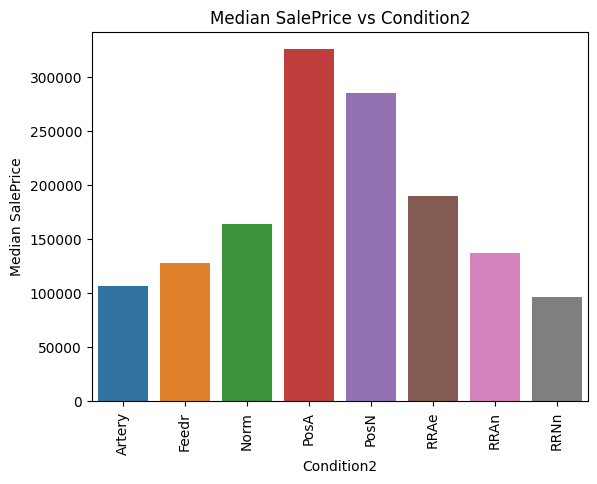

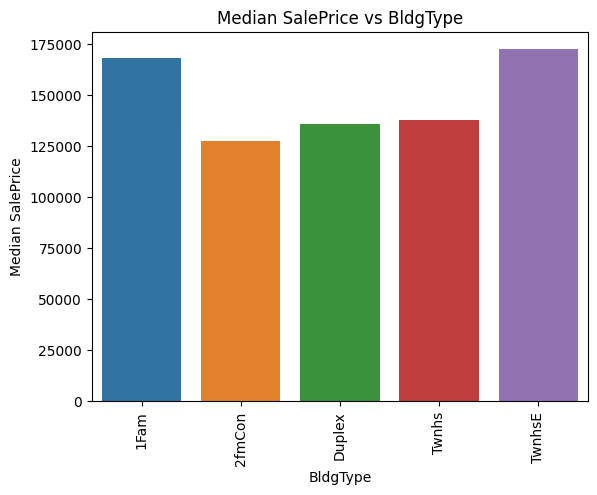

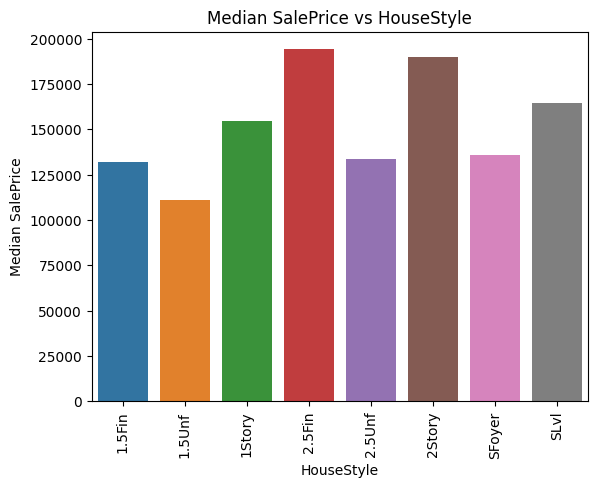

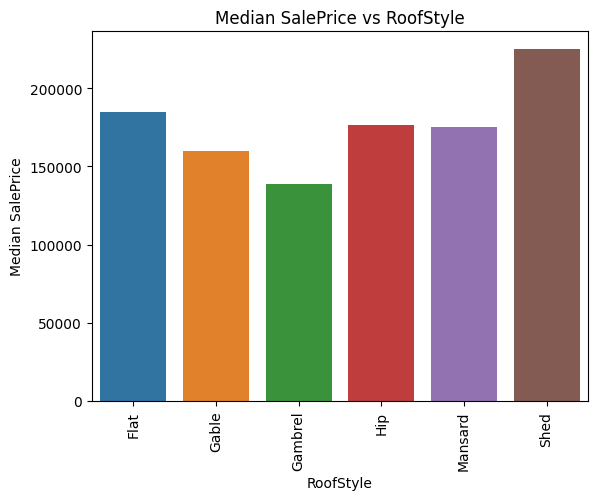

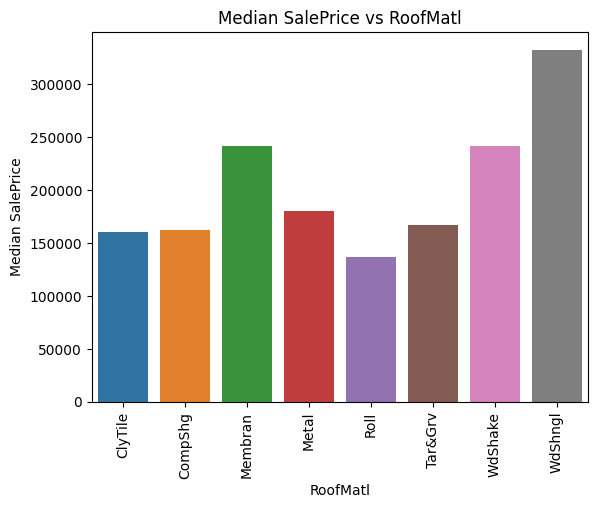

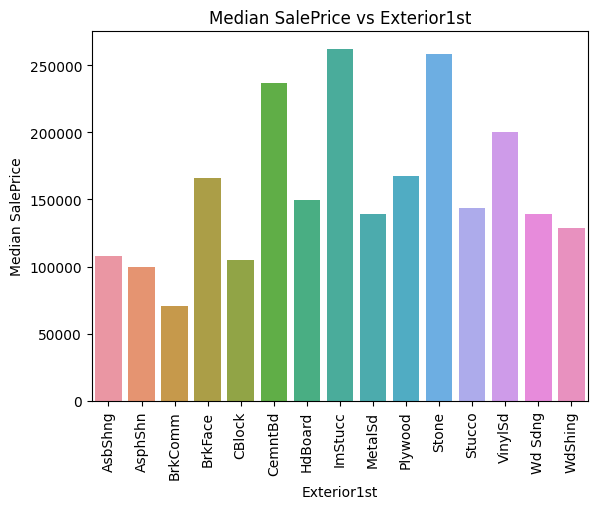

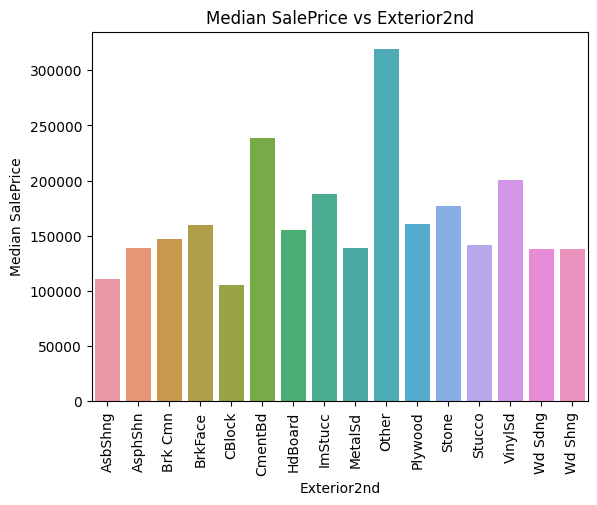

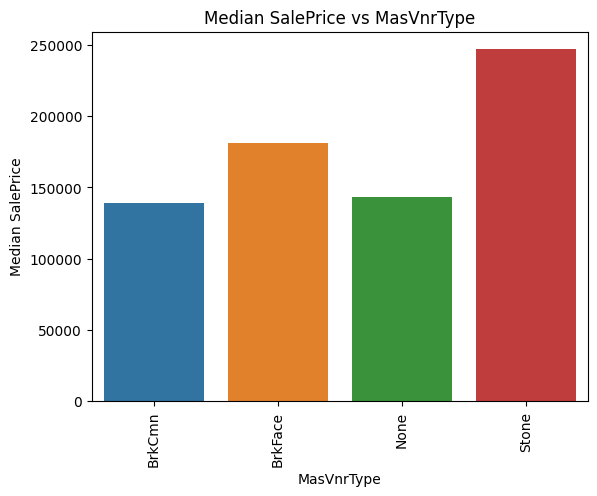

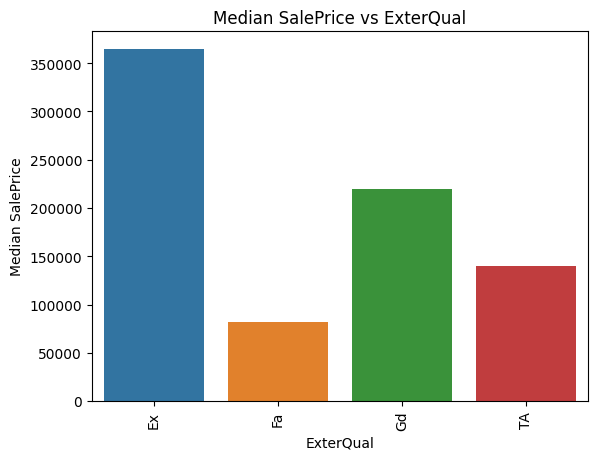

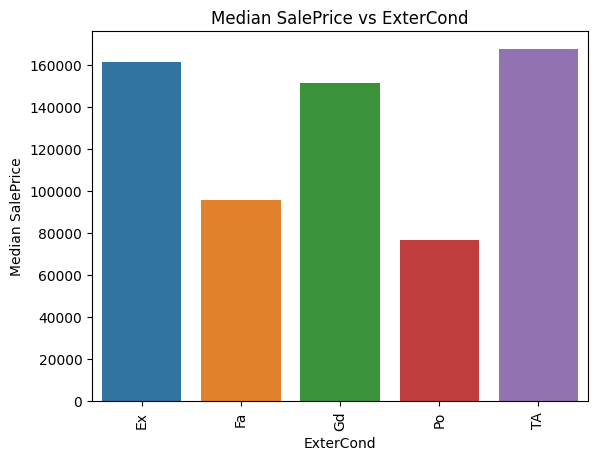

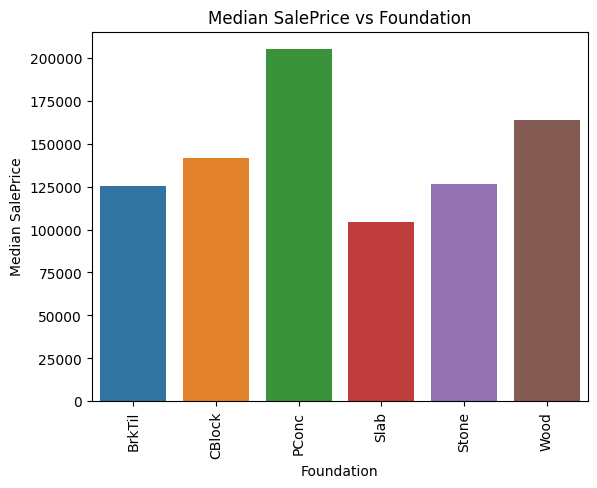

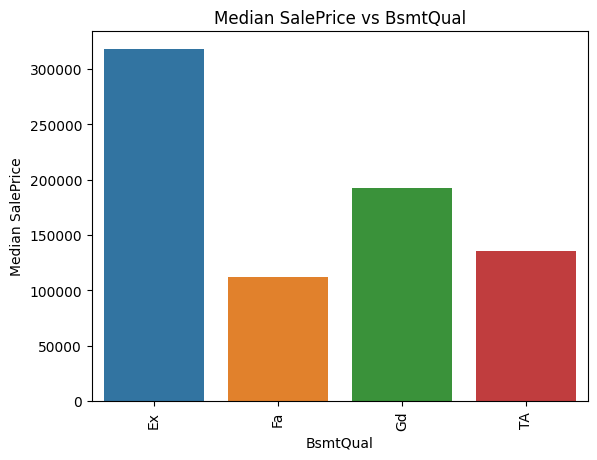

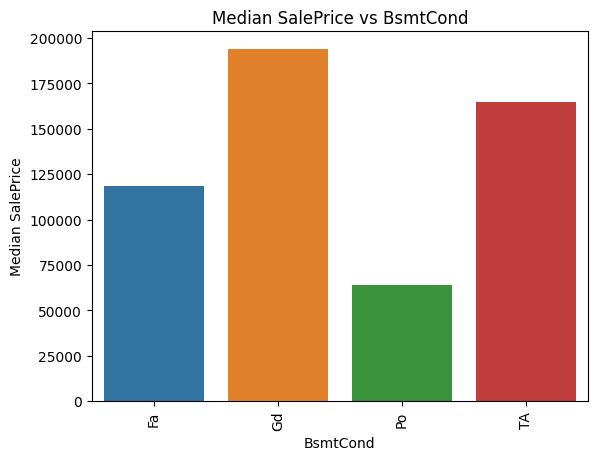

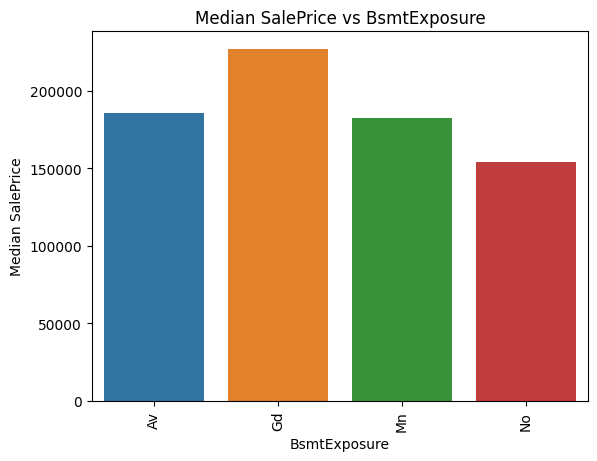

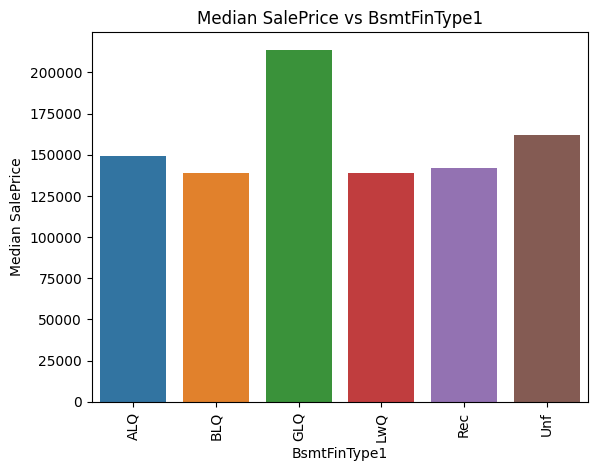

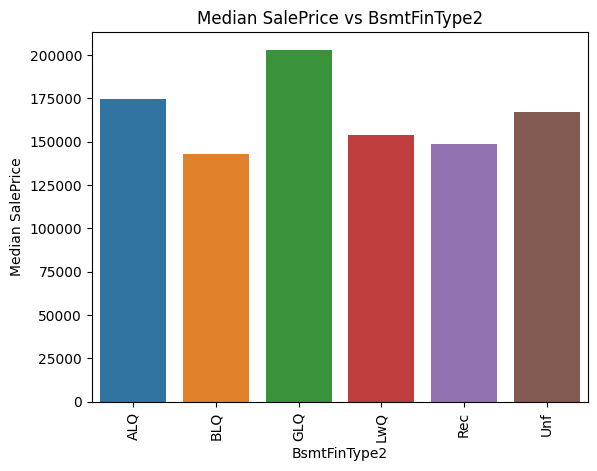

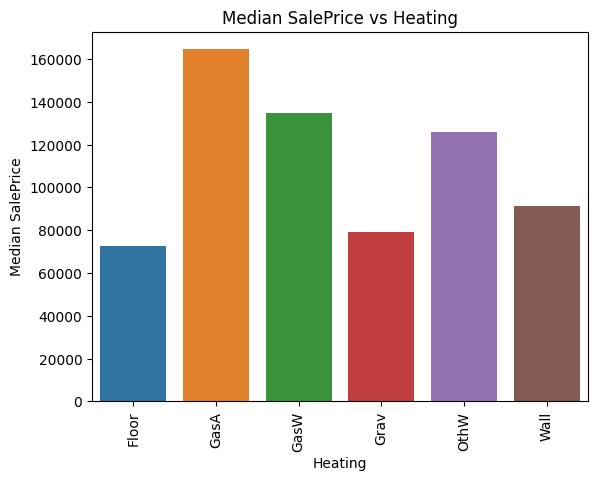

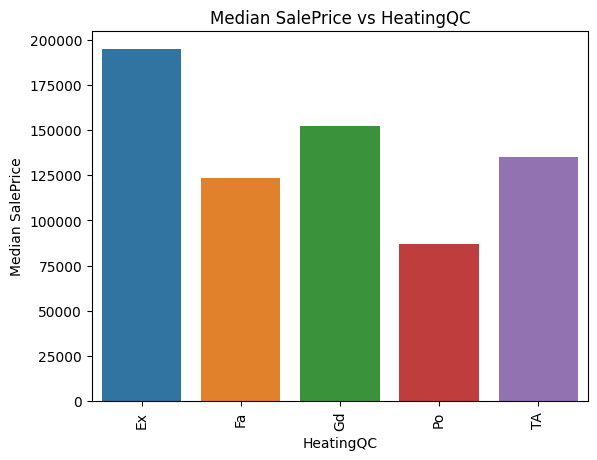

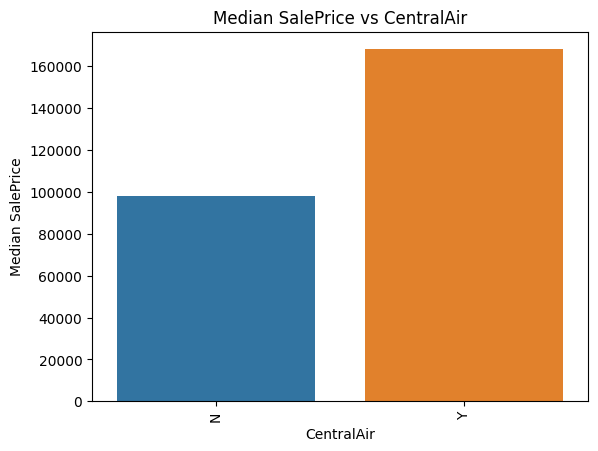

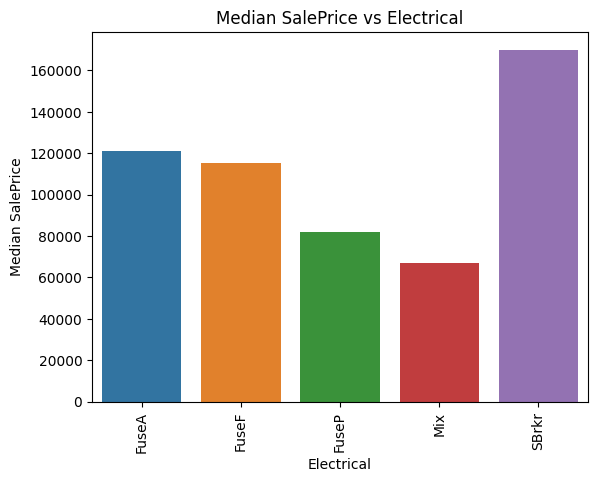

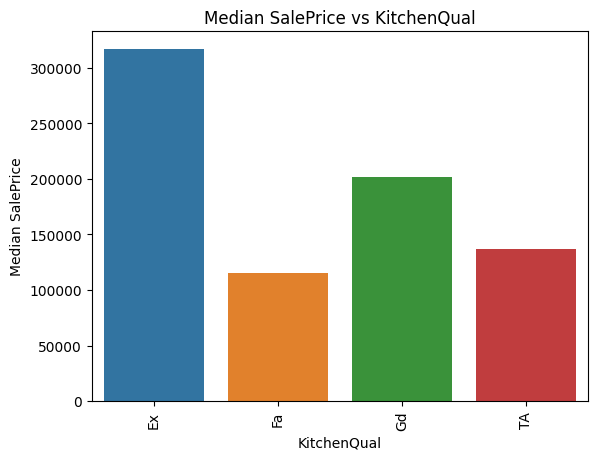

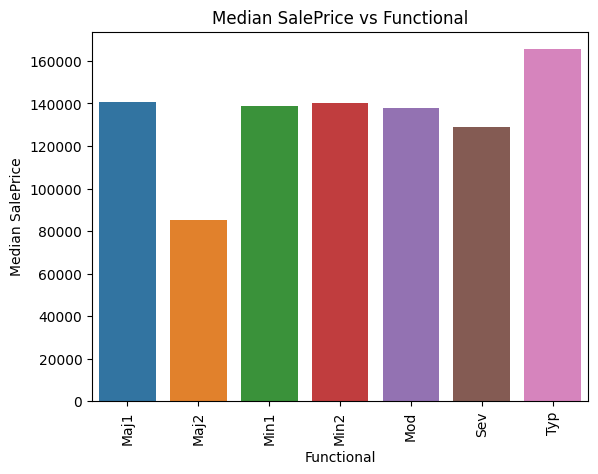

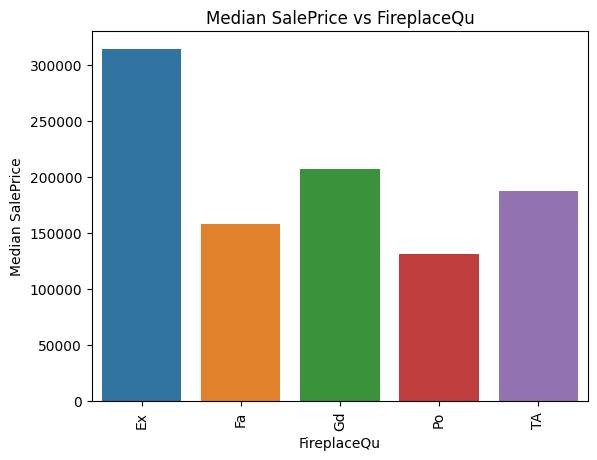

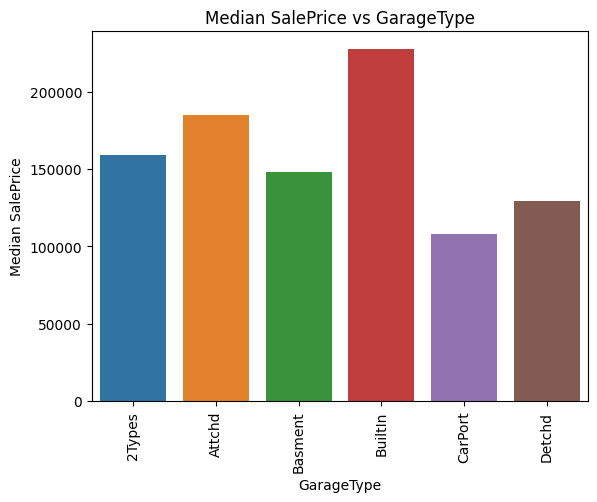

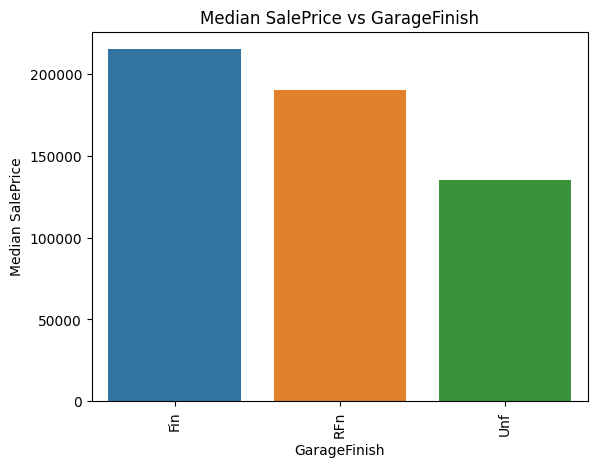

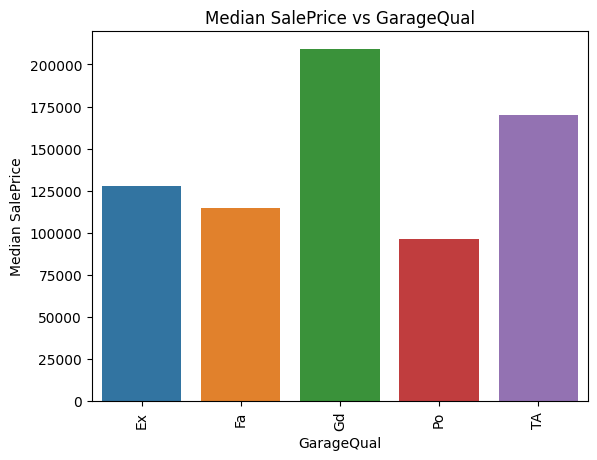

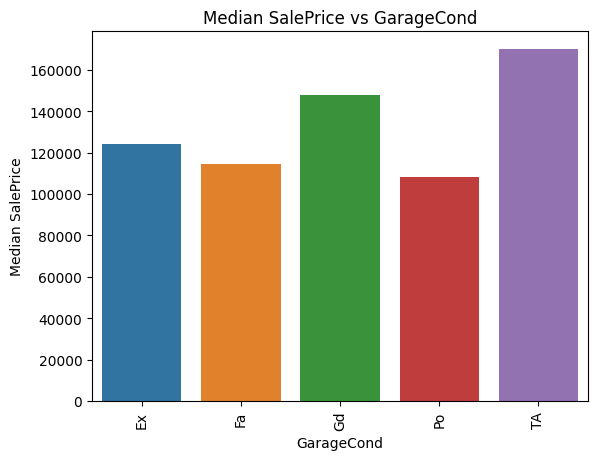

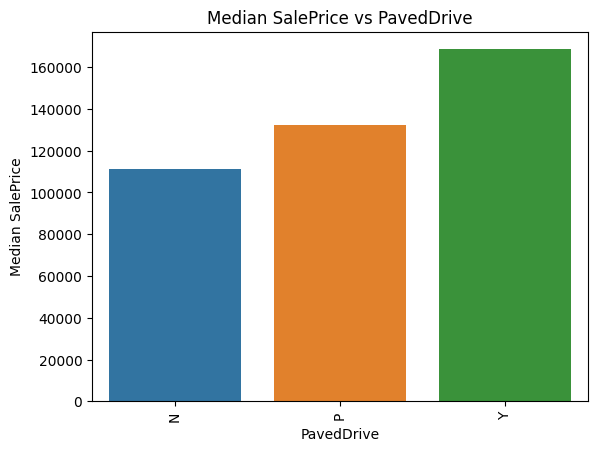

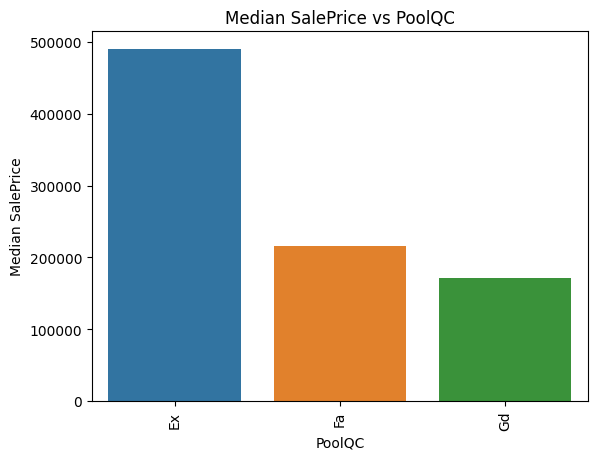

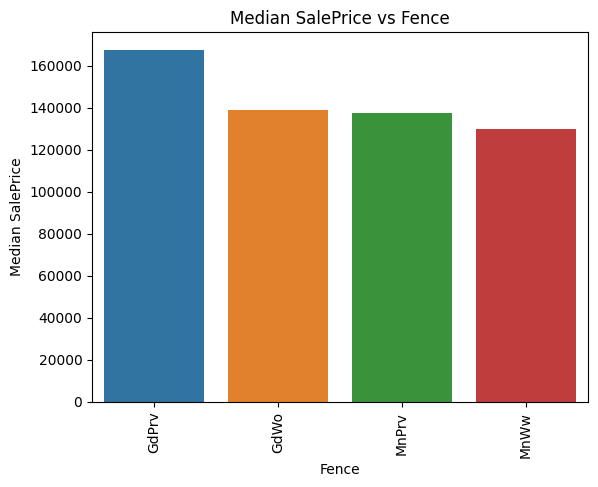

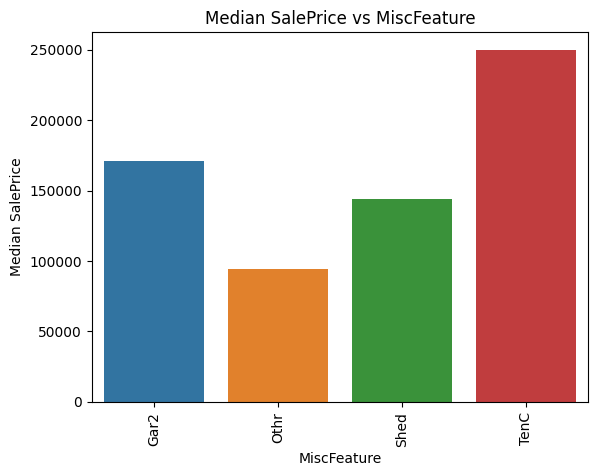

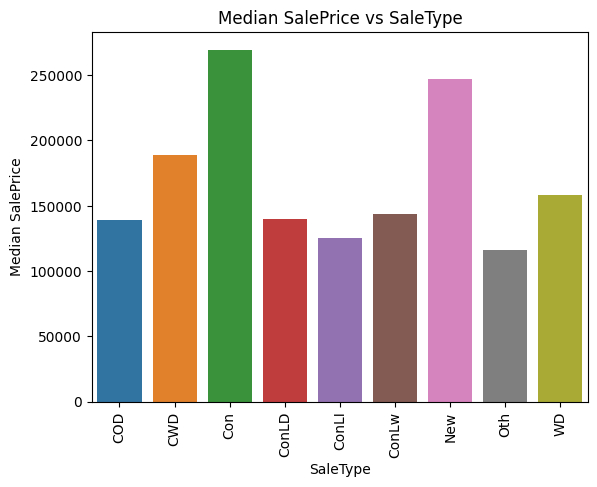

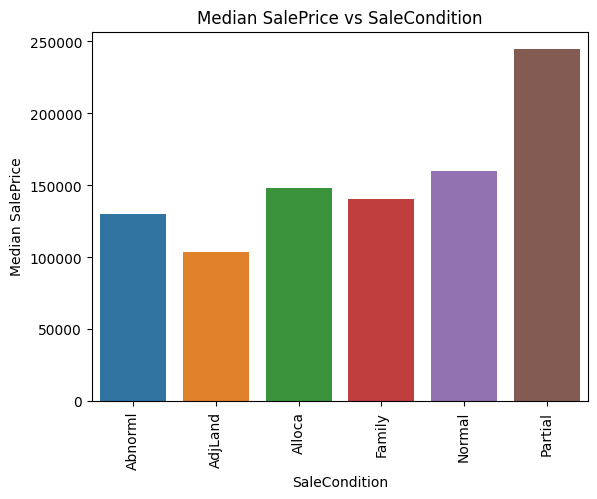

In [21]:
for col in categorical_cols:
    df7 = df.copy()

    median_prices_by_category = df7.groupby(col)['SalePrice'].median().reset_index()

    sns.barplot(x=col, y='SalePrice', data=median_prices_by_category)
    plt.xlabel(col)
    plt.ylabel('Median SalePrice')
    plt.title(f"Median SalePrice vs {col}")
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()

####**Handling Missing Values**

In [104]:
null_value_cat_cols = []
print("Percentage of missing values in all categorical columns \n")

for col in df.columns:
  null_count = df[col].isnull().sum()
  if null_count > 1 and df[col].dtypes == 'O':
    null_percentage = np.round(null_count / len(df) * 100, 2)
    print(f"{col}: {null_percentage}%")
    null_value_cat_cols.append(col)

Percentage of missing values in all categorical columns 

Alley: 93.77%
MasVnrType: 0.55%
BsmtQual: 2.53%
BsmtCond: 2.53%
BsmtExposure: 2.6%
BsmtFinType1: 2.53%
BsmtFinType2: 2.6%
FireplaceQu: 47.26%
GarageType: 5.55%
GarageFinish: 5.55%
GarageQual: 5.55%
GarageCond: 5.55%
PoolQC: 99.52%
Fence: 80.75%
MiscFeature: 96.3%


In [108]:
def fill_cat_column_na(df, null_value_cat_cols):
    df8 = df.copy()
    df8[null_value_cat_cols] = df8[null_value_cat_cols].fillna('Missing')
    return df8

df = fill_cat_column_na(df, null_value_cat_cols)
df[null_value_cat_cols].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [109]:
null_value_num_cols = []
print("Percentage of missing values in numerical columns \n")

for col in df.columns:
  null_count = df[col].isnull().sum()
  if null_count > 1 and col not in null_value_cat_cols:
    null_percentage = np.round(null_count / len(df) * 100, 2)
    print(f"{col}: {null_percentage}%")
    null_value_num_cols.append(col)

Percentage of missing values in numerical columns 

LotFrontage: 17.74%
MasVnrArea: 0.55%
GarageYrBlt: 5.55%


In [110]:
for col in null_value_num_cols:

    median_value = df[col].median()
    print(f"Median value for {col}: {median_value}")

    df[col + 'nan'] = np.where(df[col].isnull(), 1, 0)
    df[col].fillna(median_value, inplace=True)

df[null_value_num_cols].isnull().sum()


Median value for LotFrontage: 69.0
Median value for MasVnrArea: 0.0
Median value for GarageYrBlt: 1980.0


LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [111]:
df.shape

(1460, 84)

In [112]:
for col in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df[col] = df['YrSold'] - df[col]


In [113]:
num_col_without_0 = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for col in num_col_without_0:
    df[col] = np.log(df[col])

In [114]:
for col in categorical_cols:
    i = df.groupby(col)['SalePrice'].count() / len(df)
    df_i = i[i > 0.01].index
    df[col] = np.where(df[col].isin(df_i), df[col], 'Rare_var')

In [116]:
df

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley  \
0        1          60       RL     4.174387  9.041922   Pave  Missing   
1        2          20       RL     4.382027  9.169518   Pave  Missing   
2        3          60       RL     4.219508  9.328123   Pave  Missing   
3        4          70       RL     4.094345  9.164296   Pave  Missing   
4        5          60       RL     4.430817  9.565214   Pave  Missing   
...    ...         ...      ...          ...       ...    ...      ...   
1455  1456          60       RL     4.127134  8.976768   Pave  Missing   
1456  1457          20       RL     4.442651  9.486076   Pave  Missing   
1457  1458          70       RL     4.189655  9.109636   Pave  Missing   
1458  1459          20       RL     4.219508  9.181632   Pave  Missing   
1459  1460          20       RL     4.317488  9.204020   Pave  Missing   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0         Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1         Reg         Lvl    AllPub       FR2       Gtl     Rare_var   
2         IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3         IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4         IR1         Lvl    AllPub       FR2       Gtl      NoRidge   
...       ...         ...       ...       ...       ...          ...   
1455      Reg         Lvl    AllPub    Inside       Gtl      Gilbert   
1456      Reg         Lvl    AllPub    Inside       Gtl       NWAmes   
1457      Reg         Lvl    AllPub    Inside       Gtl      Crawfor   
1458      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
1459      Reg         Lvl    AllPub    Inside       Gtl      Edwards   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0          Norm       Norm     1Fam     2Story            7            5   
1         Feedr       Norm     1Fam     1Story            6            8   
2          Norm       Norm     1Fam     2Story            7            5   
3          Norm       Norm     1Fam     2Story            7            5   
4          Norm       Norm     1Fam     2Story            8            5   
...         ...        ...      ...        ...          ...          ...   
1455       Norm       Norm     1Fam     2Story            6            5   
1456       Norm       Norm     1Fam     1Story            6            6   
1457       Norm       Norm     1Fam     2Story            7            9   
1458       Norm       Norm     1Fam     1Story            5            6   
1459       Norm       Norm     1Fam     1Story            5            6   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0             5             5     Gable  CompShg     VinylSd     VinylSd   
1            31            31     Gable  CompShg     MetalSd     MetalSd   
2             7             6     Gable  CompShg     VinylSd     VinylSd   
3            91            36     Gable  CompShg     Wd Sdng     Wd Shng   
4             8             8     Gable  CompShg     VinylSd     VinylSd   
...         ...           ...       ...      ...         ...         ...   
1455          8             7     Gable  CompShg     VinylSd     VinylSd   
1456         32            22     Gable  CompShg     Plywood     Plywood   
1457         69             4     Gable  CompShg     CemntBd     CmentBd   
1458         60            14       Hip  CompShg     MetalSd     MetalSd   
1459         43            43     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1          None         0.0        TA        TA     CBlock       Gd       TA   
2       BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3          None         0.0        TA        TA     BrkTil       TA       Gd   
4       BrkFace       350.0 

#### Handling categorical features

In [119]:
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [120]:
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.cat.codes)

In [121]:
df.head(5)

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0   1          60         2     4.174387  9.041922       0      1         3   
1   2          20         2     4.382027  9.169518       0      1         3   
2   3          60         2     4.219508  9.328123       0      1         0   
3   4          70         2     4.094345  9.164296       0      1         0   
4   5          60         2     4.430817  9.565214       0      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          3          0             4           2   
1            3          0          2          0            16           1   
2            3          0          3          0             4           2   
3            3          0          0          0             5           2   
4            3          0          2          0            13           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0         0           2            7            5          5   
1           0         0           1            6            8         31   
2           0         0           2            7            5          7   
3           0         0           2            7            5         91   
4           0         0           2            8            5          8   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             5          0         0            8            8           1   
1            31          0         0            4            4           2   
2             6          0         0            8            8           1   
3            36          0         0            9           10           2   
4             8          0         0            8            8           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          1          3           2         2         4   
1         0.0          3          3           1         2         4   
2       162.0          1          3           2         2         4   
3         0.0          3          3           0         4         1   
4       350.0          1          3           2         2         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             4             2         706             6           0   
1             1             0         978             6           0   
2             3             2         486             6           0   
3             4             0         216             6           0   
4             0             2         655             6           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        0          0           1           3   
1        284         1262        0          0           1           3   
2        434          920        0          0           1           3   
3        540          756        0          2           1           3   
4        490         1145        0          0           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.752270       854             0   7.444249             1             0   
1  7.140453         0             0   7.140453             0             1   
2  6.824374       866             0   7.487734             1             0   
3  6.867974       756             0   7.448334             1             0   
4  7.043160      1053             0   7.695303             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            3             6   
2         2         1             3             1            2             6   
3         1         0             3             1        

In [122]:
pd.pandas.set_option('display.max_columns', None)

#### Standardizing Variables

In [123]:
scaling_cols = [col for col in df.columns if col not in ['Id', 'SalePrice']]

from sklearn.preprocessing import MinMaxScaler
model_scaler = MinMaxScaler()
model_scaler.fit(df[scaling_cols])

MinMaxScaler()

In [124]:
df_transformed = pd.concat([df[['Id', 'SalePrice']].reset_index(drop=True),
                     pd.DataFrame(model_scaler.transform(df[scaling_cols]), columns=scaling_cols)],
                     axis=1)

In [125]:
df_transformed.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1     208500    0.235294       0.5     0.418208  0.366344     0.0    0.5   
1   2     181500    0.000000       0.5     0.495064  0.391317     0.0    0.5   
2   3     223500    0.235294       0.5     0.434909  0.422359     0.0    0.5   
3   4     140000    0.294118       0.5     0.388581  0.390295     0.0    0.5   
4   5     250000    0.235294       0.5     0.513123  0.468761     0.0    0.5   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0       1.0          1.0        0.0       0.75        0.0      0.181818   
1       1.0          1.0        0.0       0.50        0.0      0.727273   
2       0.0          1.0        0.0       0.75        0.0      0.181818   
3       0.0          1.0        0.0       0.00        0.0      0.227273   
4       0.0          1.0        0.0       0.50        0.0      0.590909   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0         0.4         0.0       0.0         0.4     0.666667        0.500   
1         0.2         0.0       0.0         0.2     0.555556        0.875   
2         0.4         0.0       0.0         0.4     0.666667        0.500   
3         0.4         0.0       0.0         0.4     0.666667        0.500   
4         0.4         0.0       0.0         0.4     0.777778        0.500   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   0.036765      0.098361        0.0       0.0          0.8          0.8   
1   0.227941      0.524590        0.0       0.0          0.4          0.4   
2   0.051471      0.114754        0.0       0.0          0.8          0.8   
3   0.669118      0.606557        0.0       0.0          0.9          1.0   
4   0.058824      0.147541        0.0       0.0          0.8          0.8   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0        0.25     0.12250   0.333333        1.0        0.50       0.5   
1        0.50     0.00000   1.000000        1.0        0.25       0.5   
2        0.25     0.10125   0.333333        1.0        0.50       0.5   
3        0.50     0.00000   1.000000        1.0        0.00       1.0   
4        0.25     0.21875   0.333333        1.0        0.50       0.5   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      1.00          1.00      0.333333    0.125089           1.0         0.0   
1      1.00          0.25      0.000000    0.173281           1.0         0.0   
2      1.00          0.75      0.333333    0.086109           1.0         0.0   
3      0.25          1.00      0.000000    0.038271           1.0         0.0   
4      1.00          0.00      0.333333    0.116052           1.0         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.064212     0.140098      0.0        0.0         1.0         1.0   
1   0.121575     0.206547      0.0        0.0         1.0         1.0   
2   0.185788     0.150573      0.0        0.0         1.0         1.0   
3   0.231164     0.123732      0.0        0.5         1.0         1.0   
4   0.209760     0.187398      0.0        0.0         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.356155  0.413559           0.0   0.577712      0.333333           0.0   
1  0.503056  0.000000           0.0   0.470245      0.000000           0.5   
2  0.383441  0.419370           0.0   0.593095      0.333333           0.0   
3  0.399941  0.366102           0.0   0.579157      0.333333           0.0   
4  0.466237  0.509927           0.0   0.666523      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.5         0.375      0.333333     0.666667      0.500000   
1  0.666667       0.0         0.375      0.333333     1.000000      0.333333   
2  0.666667       0.5         0.375      0.333333     0.666667      0.3

In [126]:
df = df_transformed
df

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  \
0        1     208500    0.235294       0.5     0.418208  0.366344     0.0   
1        2     181500    0.000000       0.5     0.495064  0.391317     0.0   
2        3     223500    0.235294       0.5     0.434909  0.422359     0.0   
3        4     140000    0.294118       0.5     0.388581  0.390295     0.0   
4        5     250000    0.235294       0.5     0.513123  0.468761     0.0   
...    ...        ...         ...       ...          ...       ...     ...   
1455  1456     175000    0.235294       0.5     0.400718  0.353592     0.0   
1456  1457     210000    0.000000       0.5     0.517503  0.453273     0.0   
1457  1458     266500    0.294118       0.5     0.423859  0.379597     0.0   
1458  1459     142125    0.000000       0.5     0.434909  0.393688     0.0   
1459  1460     147500    0.000000       0.5     0.471175  0.398069     0.0   

      Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0       0.5       1.0          1.0        0.0       0.75        0.0   
1       0.5       1.0          1.0        0.0       0.50        0.0   
2       0.5       0.0          1.0        0.0       0.75        0.0   
3       0.5       0.0          1.0        0.0       0.00        0.0   
4       0.5       0.0          1.0        0.0       0.50        0.0   
...     ...       ...          ...        ...        ...        ...   
1455    0.5       1.0          1.0        0.0       0.75        0.0   
1456    0.5       1.0          1.0        0.0       0.75        0.0   
1457    0.5       1.0          1.0        0.0       0.75        0.0   
1458    0.5       1.0          1.0        0.0       0.75        0.0   
1459    0.5       1.0          1.0        0.0       0.75        0.0   

      Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0         0.181818         0.4         0.0       0.0         0.4     0.666667   
1         0.727273         0.2         0.0       0.0         0.2     0.555556   
2         0.181818         0.4         0.0       0.0         0.4     0.666667   
3         0.227273         0.4         0.0       0.0         0.4     0.666667   
4         0.590909         0.4         0.0       0.0         0.4     0.777778   
...            ...         ...         ...       ...         ...          ...   
1455      0.318182         0.4         0.0       0.0         0.4     0.555556   
1456      0.545455         0.4         0.0       0.0         0.2     0.555556   
1457      0.227273         0.4         0.0       0.0         0.4     0.666667   
1458      0.500000         0.4         0.0       0.0         0.2     0.444444   
1459      0.272727         0.4         0.0       0.0         0.2     0.444444   

      OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0           0.500   0.036765      0.098361        0.0       0.0          0.8   
1           0.875   0.227941      0.524590        0.0       0.0          0.4   
2           0.500   0.051471      0.114754        0.0       0.0          0.8   
3           0.500   0.669118      0.606557        0.0       0.0          0.9   
4           0.500   0.058824      0.147541        0.0       0.0          0.8   
...           ...        ...           ...        ...       ...          ...   
1455        0.500   0.058824      0.131148        0.0       0.0          0.8   
1456        0.625   0.235294      0.377049        0.0       0.0          0.5   
1457        1.000   0.507353      0.081967        0.0       0.0          0.2   
1458        0.625   0.441176      0.245902        0.5       0.0          0.4   
1459        0.625   0.316176      0.721311        0.0       0.0          0.3   

      Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0             0.8        0.25    0.122500   0.333333   1.000000        0.50   
1             0.4        0.50    0.000000   1.000000   1.000000        0.25   
2             0.8        0.25    0.101250   0.3

In [127]:
df = df.drop(['Id'], axis=1)
df

SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0        208500    0.235294       0.5     0.418208  0.366344     0.0    0.5   
1        181500    0.000000       0.5     0.495064  0.391317     0.0    0.5   
2        223500    0.235294       0.5     0.434909  0.422359     0.0    0.5   
3        140000    0.294118       0.5     0.388581  0.390295     0.0    0.5   
4        250000    0.235294       0.5     0.513123  0.468761     0.0    0.5   
...         ...         ...       ...          ...       ...     ...    ...   
1455     175000    0.235294       0.5     0.400718  0.353592     0.0    0.5   
1456     210000    0.000000       0.5     0.517503  0.453273     0.0    0.5   
1457     266500    0.294118       0.5     0.423859  0.379597     0.0    0.5   
1458     142125    0.000000       0.5     0.434909  0.393688     0.0    0.5   
1459     147500    0.000000       0.5     0.471175  0.398069     0.0    0.5   

      LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0          1.0          1.0        0.0       0.75        0.0      0.181818   
1          1.0          1.0        0.0       0.50        0.0      0.727273   
2          0.0          1.0        0.0       0.75        0.0      0.181818   
3          0.0          1.0        0.0       0.00        0.0      0.227273   
4          0.0          1.0        0.0       0.50        0.0      0.590909   
...        ...          ...        ...        ...        ...           ...   
1455       1.0          1.0        0.0       0.75        0.0      0.318182   
1456       1.0          1.0        0.0       0.75        0.0      0.545455   
1457       1.0          1.0        0.0       0.75        0.0      0.227273   
1458       1.0          1.0        0.0       0.75        0.0      0.500000   
1459       1.0          1.0        0.0       0.75        0.0      0.272727   

      Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0            0.4         0.0       0.0         0.4     0.666667        0.500   
1            0.2         0.0       0.0         0.2     0.555556        0.875   
2            0.4         0.0       0.0         0.4     0.666667        0.500   
3            0.4         0.0       0.0         0.4     0.666667        0.500   
4            0.4         0.0       0.0         0.4     0.777778        0.500   
...          ...         ...       ...         ...          ...          ...   
1455         0.4         0.0       0.0         0.4     0.555556        0.500   
1456         0.4         0.0       0.0         0.2     0.555556        0.625   
1457         0.4         0.0       0.0         0.4     0.666667        1.000   
1458         0.4         0.0       0.0         0.2     0.444444        0.625   
1459         0.4         0.0       0.0         0.2     0.444444        0.625   

      YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0      0.036765      0.098361        0.0       0.0          0.8          0.8   
1      0.227941      0.524590        0.0       0.0          0.4          0.4   
2      0.051471      0.114754        0.0       0.0          0.8          0.8   
3      0.669118      0.606557        0.0       0.0          0.9          1.0   
4      0.058824      0.147541        0.0       0.0          0.8          0.8   
...         ...           ...        ...       ...          ...          ...   
1455   0.058824      0.131148        0.0       0.0          0.8          0.8   
1456   0.235294      0.377049        0.0       0.0          0.5          0.5   
1457   0.507353      0.081967        0.0       0.0          0.2          0.2   
1458   0.441176      0.245902        0.5       0.0          0.4          0.4   
1459   0.316176      0.721311        0.0       0.0          0.3          0.3   

      MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0           0.25    0.122500   0.333333   1.000000        0.50       0.5   
1           0.50    0.000000   1.000000   1.00

In [128]:
end_col = df.pop('SalePrice')
df.insert(len(df.columns), 'SalePrice', end_col)
df

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0       0.235294       0.5     0.418208  0.366344     0.0    0.5       1.0   
1       0.000000       0.5     0.495064  0.391317     0.0    0.5       1.0   
2       0.235294       0.5     0.434909  0.422359     0.0    0.5       0.0   
3       0.294118       0.5     0.388581  0.390295     0.0    0.5       0.0   
4       0.235294       0.5     0.513123  0.468761     0.0    0.5       0.0   
...          ...       ...          ...       ...     ...    ...       ...   
1455    0.235294       0.5     0.400718  0.353592     0.0    0.5       1.0   
1456    0.000000       0.5     0.517503  0.453273     0.0    0.5       1.0   
1457    0.294118       0.5     0.423859  0.379597     0.0    0.5       1.0   
1458    0.000000       0.5     0.434909  0.393688     0.0    0.5       1.0   
1459    0.000000       0.5     0.471175  0.398069     0.0    0.5       1.0   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0             1.0        0.0       0.75        0.0      0.181818         0.4   
1             1.0        0.0       0.50        0.0      0.727273         0.2   
2             1.0        0.0       0.75        0.0      0.181818         0.4   
3             1.0        0.0       0.00        0.0      0.227273         0.4   
4             1.0        0.0       0.50        0.0      0.590909         0.4   
...           ...        ...        ...        ...           ...         ...   
1455          1.0        0.0       0.75        0.0      0.318182         0.4   
1456          1.0        0.0       0.75        0.0      0.545455         0.4   
1457          1.0        0.0       0.75        0.0      0.227273         0.4   
1458          1.0        0.0       0.75        0.0      0.500000         0.4   
1459          1.0        0.0       0.75        0.0      0.272727         0.4   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0            0.0       0.0         0.4     0.666667        0.500   0.036765   
1            0.0       0.0         0.2     0.555556        0.875   0.227941   
2            0.0       0.0         0.4     0.666667        0.500   0.051471   
3            0.0       0.0         0.4     0.666667        0.500   0.669118   
4            0.0       0.0         0.4     0.777778        0.500   0.058824   
...          ...       ...         ...          ...          ...        ...   
1455         0.0       0.0         0.4     0.555556        0.500   0.058824   
1456         0.0       0.0         0.2     0.555556        0.625   0.235294   
1457         0.0       0.0         0.4     0.666667        1.000   0.507353   
1458         0.0       0.0         0.2     0.444444        0.625   0.441176   
1459         0.0       0.0         0.2     0.444444        0.625   0.316176   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0         0.098361        0.0       0.0          0.8          0.8        0.25   
1         0.524590        0.0       0.0          0.4          0.4        0.50   
2         0.114754        0.0       0.0          0.8          0.8        0.25   
3         0.606557        0.0       0.0          0.9          1.0        0.50   
4         0.147541        0.0       0.0          0.8          0.8        0.25   
...            ...        ...       ...          ...          ...         ...   
1455      0.131148        0.0       0.0          0.8          0.8        0.50   
1456      0.377049        0.0       0.0          0.5          0.5        1.00   
1457      0.081967        0.0       0.0          0.2          0.2        0.50   
1458      0.245902        0.5       0.0          0.4          0.4        0.50   
1459      0.721311        0.0       0.0          0.3          0.3        0.50   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       0.122500   0.333333   1.000000        0.50       0.5      1.00   
1       0.000000   1.000000   1.000000

#### Splitting of data

In [42]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 0 )


#### Model Building and Evaluation

In [131]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def regression_metrics(ytest, ytest_pred):

    RMSE = mean_squared_error(ytest,ytest_pred,squared=False)
    MSE = mean_squared_error(ytest,ytest_pred,squared=True)
    MAE = mean_absolute_error(ytest, ytest_pred)
    R2_score = r2_score(ytest,ytest_pred)
    Adj_R2_score = 1-(1-R2_score)*1.23

    print("RMSE:",RMSE)
    print("MSE:", MSE)
    print("MAE", MAE)
    print("R2_score:", R2_score)
    print("Adj_R2_score:", Adj_R2_score)
    return

##### Lasso Regression

In [132]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha = 0.1)
model_lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [133]:
y_pred_lasso_test = model_lasso.predict(X_test)
y_pred_lasso_test

data_pred_lasso_test = pd.DataFrame()
data_pred_lasso_test["y_actual"]=y_test
data_pred_lasso_test["y_predicted"]=np.round(y_pred_lasso_test,1)
data_pred_lasso_test

y_actual  y_predicted
0      200624     211258.8
1      133000     160648.1
2      110000     109470.7
3      192000     225723.7
4       88000      72317.8
..        ...          ...
433    241500     238147.8
434    127500     164180.1
435    350000     329401.6
436    227000     212485.3
437    611657     432572.7

[438 rows x 2 columns]

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data_pred_lasso_test, *['y_actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data_pred_lasso_test, *['y_predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data_pred_lasso_test, *['y_actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data_pred_lasso_test, *['y_predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(data_pred_lasso_test, *[[['y_actual', 'y_predicted']]], **{})
chart

In [134]:
regression_metrics(y_test, y_pred_lasso_test)

RMSE: 39664.98017356942
MSE: 1573310652.169655
MAE 21275.60100580882
R2_score: 0.7682556141289717
Adj_R2_score: 0.7149544053786352


#### Lasso Regression using GD optimization method from scratch

In [135]:
# Lasso Regression

class LassoRegression() :

    def __init__( self, learning_rate, iterations, l1_penality ) :

        self.learning_rate = learning_rate

        self.iterations = iterations

        self.l1_penality = l1_penality

    # Function for model training

    def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features

        self.m, self.n = X.shape

        # weight initialization

        self.W = np.zeros( self.n )

        self.b = 0

        self.X = X

        self.Y = Y

        # gradient descent learning

        for i in range( self.iterations ) :

            self.update_weights()

        return self

    # Helper function to update weights in gradient descent

    def update_weights( self ) :

        Y_pred = self.predict( self.X )

        # calculate gradients

        dW = np.zeros( self.n )

        for j in range( self.n ) :

            if self.W[j] > 0 :

                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) )

                         + self.l1_penality ) / self.m

            else :

                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) )

                         - self.l1_penality ) / self.m


        db = - 2 * np.sum( self.Y - Y_pred ) / self.m

        # update weights

        self.W = self.W - self.learning_rate * dW

        self.b = self.b - self.learning_rate * db

        return self

    # Hypothetical function  h( x )

    def predict( self, X ) :

        return X.dot( self.W ) + self.b


In [136]:
# Model training

model_lasso_scratch = LassoRegression( iterations = 1000, learning_rate = 0.01, l1_penality = 500 )

model_lasso_scratch.fit( X_train, y_train )

# Prediction on test set

y_pred_lasso_scratch_test = model_lasso_scratch.predict( X_test )

print( "Predicted values ", np.round( y_pred_lasso_scratch_test[:3], 2 ) )

print( "Real values      ", y_test[:3] )

print( "Trained W        ", round( model_lasso_scratch.W[0], 2 ) )

print( "Trained b        ", round( model_lasso_scratch.b, 2 ) )


Predicted values  [242621.32 165214.55 116505.93]
Real values       [200624 133000 110000]
Trained W         -7136.34
Trained b         13951.1


In [137]:
regression_metrics(y_test, y_pred_lasso_scratch_test)

RMSE: 38753.90861124757
MSE: 1501865432.6489289
MAE 22713.022359345847
R2_score: 0.7787793009154425
Adj_R2_score: 0.7278985401259942


#### Ridge regression

In [143]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha = 0.1)
model_ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [144]:
y_pred_ridge_test = model_ridge.predict(X_test)
y_pred_ridge_test

data_pred_ridge_test = pd.DataFrame()
data_pred_ridge_test["y_actual"]=y_test
data_pred_ridge_test["y_predicted"]=np.round(y_pred_ridge_test,1)
data_pred_ridge_test

y_actual  y_predicted
0      200624     211826.4
1      133000     162750.6
2      110000     108634.5
3      192000     225687.6
4       88000      73429.8
..        ...          ...
433    241500     239277.4
434    127500     165064.8
435    350000     329933.5
436    227000     212781.9
437    611657     432446.9

[438 rows x 2 columns]

In [145]:
regression_metrics(y_test, y_pred_ridge_test)

RMSE: 40545.00899618996
MSE: 1643897754.5011249
MAE 21375.130188648833
R2_score: 0.7578583256737874
Adj_R2_score: 0.7021657405787585


#### Ridge regression by using GD optimization method from scratch

In [146]:
# Ridge Regression

class RidgeRegression() :

    def __init__( self, learning_rate, iterations, l2_penality ) :

        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_penality = l2_penality

    # Function for model training
    def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape

        # weight initialization
        self.W = np.zeros( self.n )

        self.b = 0
        self.X = X
        self.Y = Y

        # gradient descent learning

        for i in range( self.iterations ) :
            self.update_weights()
        return self

    # Helper function to update weights in gradient descent

    def update_weights( self ) :
        Y_pred = self.predict( self.X )

        # calculate gradients
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +
               ( 2 * self.l2_penality * self.W ) ) / self.m
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m

        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        return self

    # Hypothetical function  h( x )
    def predict( self, X ) :
        return X.dot( self.W ) + self.b


In [147]:
# Model training
model_ridge_scratch = RidgeRegression( iterations = 1000,
                            learning_rate = 0.01, l2_penality = 1 )
model_ridge_scratch.fit( X_train, y_train )

# Prediction on test set
y_pred_ridge_scratch_test = model_ridge_scratch.predict( X_test )
print( "Predicted values ", np.round( y_pred_ridge_scratch_test[:3], 2 ) )
print( "Real values      ", y_test[:3] )
print( "Trained W        ", round( model_ridge_scratch.W[0], 2 ) )
print( "Trained b        ", round( model_ridge_scratch.b, 2 ) )

Predicted values  [242385.7  165005.   116568.24]
Real values       [200624 133000 110000]
Trained W         -7089.76
Trained b         14135.91


In [149]:
regression_metrics(y_test, y_pred_ridge_scratch_test)

RMSE: 38770.826331612894
MSE: 1503176974.4360878
MAE 22694.02581557811
R2_score: 0.7785861143724097
Adj_R2_score: 0.7276609206780639


#### ElasticNet Regression

In [150]:
from sklearn.linear_model import ElasticNet

model_elastic = ElasticNet(alpha=0.1)
model_elastic.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [151]:
y_pred_elastic_test = model_elastic.predict(X_test)
y_pred_elastic_test

data_pred_elastic_test = pd.DataFrame()
data_pred_elastic_test["y_actual"]=y_test
data_pred_elastic_test["y_predicted"]=np.round(y_pred_elastic_test,1)
data_pred_elastic_test

y_actual  y_predicted
0      200624     221138.9
1      133000     157183.4
2      110000     126030.8
3      192000     217033.3
4       88000      81833.8
..        ...          ...
433    241500     219985.0
434    127500     161034.9
435    350000     284694.5
436    227000     213059.9
437    611657     365965.8

[438 rows x 2 columns]

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data_pred_elastic_test, *['y_actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data_pred_elastic_test, *['y_predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data_pred_elastic_test, *['y_actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data_pred_elastic_test, *['y_predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(data_pred_elastic_test, *[[['y_actual', 'y_predicted']]], **{})
chart

In [152]:
regression_metrics(y_test, y_pred_elastic_test)

RMSE: 40213.89406674755
MSE: 1617157276.0115933
MAE 22837.715511988794
R2_score: 0.761797125526765
Adj_R2_score: 0.7070104643979209


#### ElasticNet regression by using GD optimization method from scratch.

In [153]:
# Elastic Net Regression

class ElasticRegression() :

    def __init__( self, learning_rate, iterations, l1_penality, l2_penality ) :

        self.learning_rate = learning_rate

        self.iterations = iterations

        self.l1_penality = l1_penality

        self.l2_penality = l2_penality

    # Function for model training

    def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features

        self.m, self.n = X.shape

        # weight initialization

        self.W = np.zeros( self.n )

        self.b = 0

        self.X = X

        self.Y = Y

        # gradient descent learning

        for i in range( self.iterations ) :

            self.update_weights()

        return self

    # Helper function to update weights in gradient descent

    def update_weights( self ) :

        Y_pred = self.predict( self.X )

        # calculate gradients

        dW = np.zeros( self.n )

        for j in range( self.n ) :

            if self.W[j] > 0 :

                dW[j] = ( - ( 2 * ( self.X[:,j] ).dot( self.Y - Y_pred ) ) +

                         self.l1_penality + 2 * self.l2_penality * self.W[j] ) / self.m

            else :

                dW[j] = ( - ( 2 * ( self.X[:,j] ).dot( self.Y - Y_pred ) )

                         - self.l1_penality + 2 * self.l2_penality * self.W[j] ) / self.m


        db = - 2 * np.sum( self.Y - Y_pred ) / self.m

        # update weights

        self.W = self.W - self.learning_rate * dW

        self.b = self.b - self.learning_rate * db

        return self

    # Hypothetical function  h( x )

    def predict( self, X ) :

        return X.dot( self.W ) + self.b

In [154]:
# Model training

model_elasticNet = ElasticRegression( iterations = 1000,

                      learning_rate = 0.01, l1_penality = 500, l2_penality = 1 )

model_elasticNet.fit( X_train, y_train )

# Prediction on test set

y_pred_elasticNet_test = model_elasticNet.predict( X_test )

print( "Predicted values ", np.round( y_pred_elasticNet_test[:3], 2 ) )

print( "Real values      ", y_test[:3] )

print( "Trained W        ", round( model_elasticNet.W[0], 2 ) )

print( "Trained b        ", round( model_elasticNet.b, 2 ) )

Predicted values  [242389.35 165004.69 116572.16]
Real values       [200624 133000 110000]
Trained W         -7087.53
Trained b         14139.92


In [155]:
regression_metrics(y_test, y_pred_elastic_test)

RMSE: 40213.89406674755
MSE: 1617157276.0115933
MAE 22837.715511988794
R2_score: 0.761797125526765
Adj_R2_score: 0.7070104643979209
